# 1. Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# 2. Import Library

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 3.Import Dataset

In [382]:
data=pd.read_csv("census_income.csv")

In [383]:
data.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


# 4.Basic Data Exploration

**Below are the information about the dataset column:**
- Age: individual age

- Workclass: The individual employment status.

- Fnlwgt: Final Weight, the number of people the census believes the entry represents.

- Education: The highest level education of individual

- Education_num: This is in numeric form of highest level education of individual

- Marital_status:marital status of an individual

- Occupation: The type of occupation of an individual

- Relationship: Represents individual relative to others

- Race : Description of an individual's race

- Sex: sex of an individual

- Capital Gain: Captital gains of individual
    
- Capital Loss: Capital loss of individual

- Hours per week: Hours per week individual has reported work.

- Native Country: Country of origin of individual

- Income: Income of individual, <=50k and > 50K.

## 4.1 Shape of Dataset

In [384]:
data.shape

(32560, 15)

**There are 32560 rows and 15 columns in dataset.**

In [385]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

**Columns name in dataset**

In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Below are the observation**
- We can see there is no null value in data set.

- There are 6 columns which data type is int64 and 9 columns are object data type.


## 4.2 Statistical Summary

In [387]:
data.describe(include="all")

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


**Below are the observation:**
- There are 32560 rows count in all columns.

- There are some columns where mean value and 50% value is very near,like Age,Education_num,Hours per week. this signify that data would be normally distribute.

- There are some column like capital gain and capital loss where minimum,50% and 75% value is 0.



## 4.3 Checking Null Value

In [388]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

**To confirm that dataset dont have null values.**

# 5 Seperating Numerical and Categorical Columns

In [389]:
numeric_feat=[]
categorical_feat=[]
num=["int64","float64"]
cat=["O"]
for column in data.columns:
    if data[column].dtypes in num:
        numeric_feat.append(column)
    if data[column].dtypes in cat:
        categorical_feat.append(column)

In [390]:
numeric_data=data[numeric_feat]

In [391]:
categorical_data=data[categorical_feat]

In [392]:
numeric_data

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [393]:
categorical_data

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


# 6. Exploring Categorical features.

In [394]:
unique_cat=[]
for i in categorical_feat:
    unique=data[i].value_counts()
    unique_cat.append(unique)
    unique_cat.append("***************************")
    

In [395]:
unique_cat

[ Private             22696
  Self-emp-not-inc     2541
  Local-gov            2093
  ?                    1836
  State-gov            1297
  Self-emp-inc         1116
  Federal-gov           960
  Without-pay            14
  Never-worked            7
 Name: Workclass, dtype: int64,
 '***************************',
  HS-grad         10501
  Some-college     7291
  Bachelors        5354
  Masters          1723
  Assoc-voc        1382
  11th             1175
  Assoc-acdm       1067
  10th              933
  7th-8th           646
  Prof-school       576
  9th               514
  12th              433
  Doctorate         413
  5th-6th           333
  1st-4th           168
  Preschool          51
 Name: Education, dtype: int64,
 '***************************',
  Married-civ-spouse       14976
  Never-married            10682
  Divorced                  4443
  Separated                 1025
  Widowed                    993
  Married-spouse-absent      418
  Married-AF-spouse           23
 Name

**Observation from above:**

we have found that there are "?" in workclass,Occupation and Native Country columns, which represent null value in dataset.

In [396]:
def whitespace(dataframe):
    for i in dataframe.columns:
        if dataframe[i].dtype=="object":
            dataframe[i]=dataframe[i].map(str.strip)
        else:
            pass


**There are white space in object type columns so above custom function has been called to remove whitespace from all required columns.**

In [397]:
whitespace(data)

In [398]:
for i in data.columns:
    print("Column:",i,", Missing Values:",data.loc[data[i]=="?",i].size)

Column: Age , Missing Values: 0
Column: Workclass , Missing Values: 1836
Column: Fnlwgt , Missing Values: 0
Column: Education , Missing Values: 0
Column: Education_num , Missing Values: 0
Column: Marital_status , Missing Values: 0
Column: Occupation , Missing Values: 1843
Column: Relationship , Missing Values: 0
Column: Race , Missing Values: 0
Column: Sex , Missing Values: 0
Column: Capital_gain , Missing Values: 0
Column: Capital_loss , Missing Values: 0
Column: Hours_per_week , Missing Values: 0
Column: Native_country , Missing Values: 583
Column: Income , Missing Values: 0


**Below are the observation:**
- Workclass having "?"(missing value) 1836 

- Occupation having "?"(missing value) 1843

- Native_country having "?"(missing value) 583

### Dealing with Workclass columns

In [399]:
data[data["Workclass"]=="?"]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


**Workclass we can't fill with any value so we need to remove those rows.**

In [400]:
data.drop(data[data["Workclass"]=="?"].index,inplace=True)

In [401]:
for i in data.columns:
    print("Column:",i,", Missing Values:",data.loc[data[i]=="?",i].size)

Column: Age , Missing Values: 0
Column: Workclass , Missing Values: 0
Column: Fnlwgt , Missing Values: 0
Column: Education , Missing Values: 0
Column: Education_num , Missing Values: 0
Column: Marital_status , Missing Values: 0
Column: Occupation , Missing Values: 7
Column: Relationship , Missing Values: 0
Column: Race , Missing Values: 0
Column: Sex , Missing Values: 0
Column: Capital_gain , Missing Values: 0
Column: Capital_loss , Missing Values: 0
Column: Hours_per_week , Missing Values: 0
Column: Native_country , Missing Values: 556
Column: Income , Missing Values: 0


**As we can see above that by dropping Workclass rows for "?", Occupation rows also got dropped where data had "?" in rows and remaining 7 missing value and Native_country missing value present in dataset.**

### Dealing with Occupaction & Native Country Columns

In [402]:
data.drop(data[data["Occupation"]=="?"].index,inplace=True)

In [403]:
data.drop(data[data["Native_country"]=="?"].index,inplace=True)

In [404]:
for i in data.columns:
    print("Column:",i,", Missing Values:",data.loc[data[i]=="?",i].size)

Column: Age , Missing Values: 0
Column: Workclass , Missing Values: 0
Column: Fnlwgt , Missing Values: 0
Column: Education , Missing Values: 0
Column: Education_num , Missing Values: 0
Column: Marital_status , Missing Values: 0
Column: Occupation , Missing Values: 0
Column: Relationship , Missing Values: 0
Column: Race , Missing Values: 0
Column: Sex , Missing Values: 0
Column: Capital_gain , Missing Values: 0
Column: Capital_loss , Missing Values: 0
Column: Hours_per_week , Missing Values: 0
Column: Native_country , Missing Values: 0
Column: Income , Missing Values: 0


**we can see there is no missing value("?") in dataset.**

In [405]:
data.shape

(30161, 15)

In [406]:
data.reset_index(inplace=True,drop=True)

In [407]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**There are 30161 rows and 15 columns after romoving "?" (missing value) from dataset.**

# 7. Exploratory Data Analysis

## 7.1 Univariate Analysis

In [408]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

### Age feature

<AxesSubplot:xlabel='Age', ylabel='Density'>

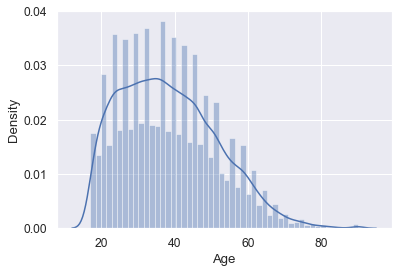

In [409]:
sns.distplot(data["Age"])

**Age data is almost look like normal distribution and also having some skewness in data.**

### Workclass feature

<AxesSubplot:xlabel='Workclass', ylabel='count'>

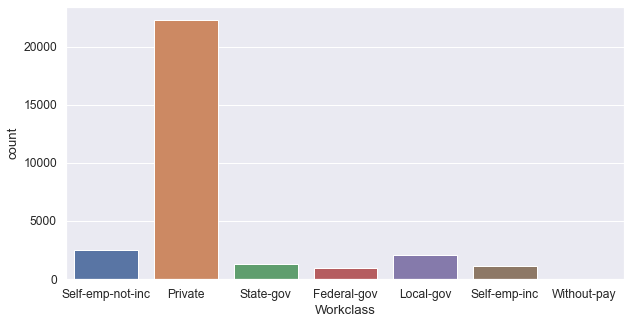

In [410]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
sns.countplot(data["Workclass"])

In [411]:
data["Workclass"].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1278
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: Workclass, dtype: int64

**Maximum individual are working in private company and very few individual are without pay means not working.**

### Final weight(Fnlwgt)

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

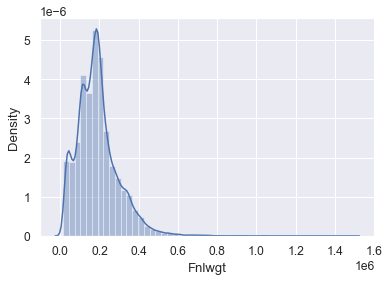

In [412]:
sns.distplot(data["Fnlwgt"])

**We can see from above plot that Finalweight data is looks like normally distributed and having right side skewness.**

### Education feature

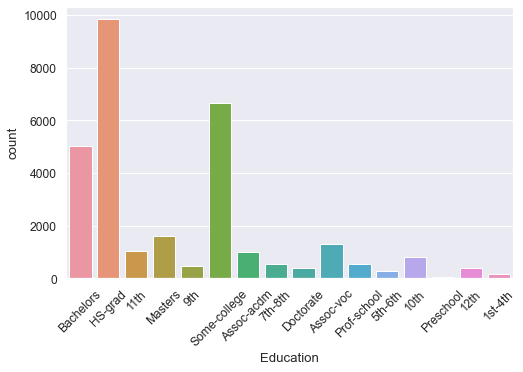

In [413]:
plt.figure(figsize=(8,5))
s=sns.countplot(data["Education"])
s.set_xticklabels(s.get_xticklabels(),rotation=45);

In [414]:
data["Education"].value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5043
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: Education, dtype: int64

**We can interpret that HS-grad are maximum individual in education and very less in preschool category.**

### Marital status Feature

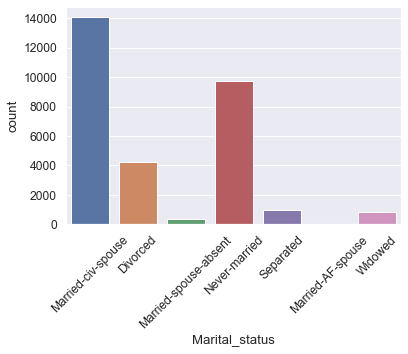

In [415]:
s=sns.countplot(data["Marital_status"])
s.set_xticklabels(s.get_xticklabels(),rotation=45);

In [416]:
data["Marital_status"].value_counts()

Married-civ-spouse       14065
Never-married             9725
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: Marital_status, dtype: int64

**we can interpret that 14065 individual who are married having spouse in civil and very few having spouse from Armed Force.**

### Occupation feature

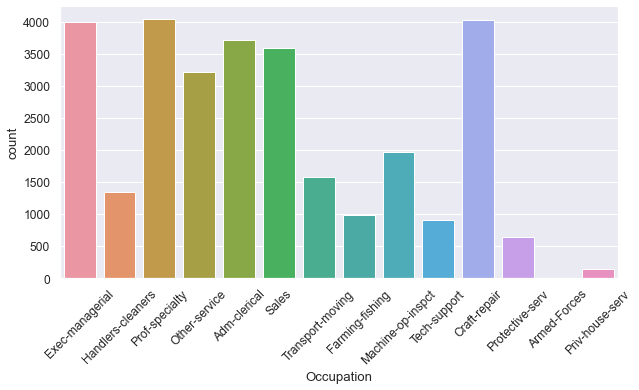

In [417]:
plt.figure(figsize=(10,5))
s=sns.countplot(data["Occupation"])
s.set_xticklabels(s.get_xticklabels(),rotation=45);

In [418]:
data["Occupation"].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3720
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: Occupation, dtype: int64

**we can see maximum occupation of individual are Prof-specialty,craft-repair and exec managerial, Very few with armed forces.**

### Relationship

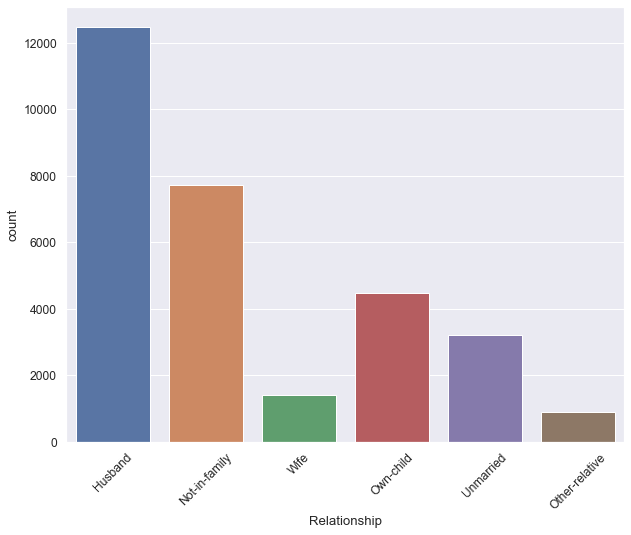

In [419]:
plt.figure(figsize=(10,8))
s=sns.countplot(data["Relationship"])
s.set_xticklabels(s.get_xticklabels(),rotation=45);

In [420]:
data["Relationship"].value_counts()

Husband           12463
Not-in-family      7725
Own-child          4466
Unmarried          3212
Wife               1406
Other-relative      889
Name: Relationship, dtype: int64

**maximum individual relationship is Husband type followed by not in family.**

### Race feature

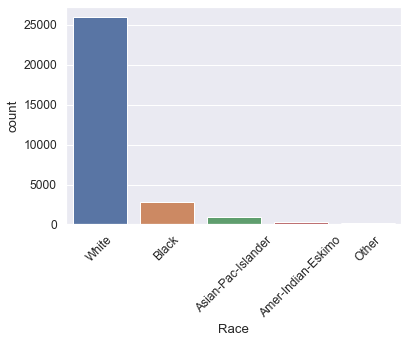

In [421]:
s=sns.countplot(data["Race"])
s.set_xticklabels(s.get_xticklabels(),rotation=45);

In [422]:
data["Race"].value_counts()

White                 25932
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: Race, dtype: int64

### Sex feature

<AxesSubplot:xlabel='Sex', ylabel='count'>

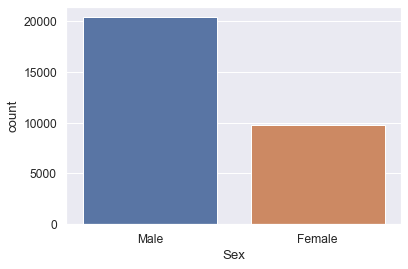

In [423]:
sns.countplot(data["Sex"])

In [424]:
data["Sex"].value_counts()

Male      20379
Female     9782
Name: Sex, dtype: int64

**we can interpret that maximum individual is male in dataset.**

### Capital Gain

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

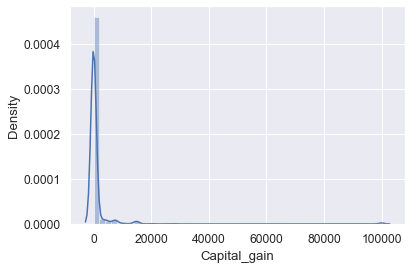

In [425]:
sns.distplot(data["Capital_gain"])

**Capital Gain represent the individual income apart from salary.So thats why lot of individual capital gain is zero.which make sense becuase many individual have single income source.**

### Capital loss feature

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

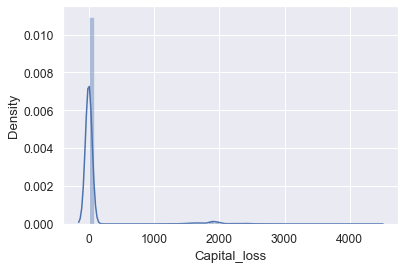

In [426]:
sns.distplot(data["Capital_loss"])

**We can see maximum individual Capital loss is zero in dataset.**

### Hours per week

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

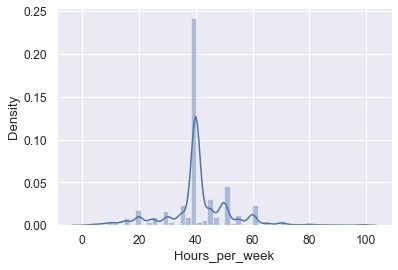

In [427]:
sns.distplot(data["Hours_per_week"])

**we can interpret that hours per week data looks like somewhere normally distributed and having some outliers and both side skewedness.**

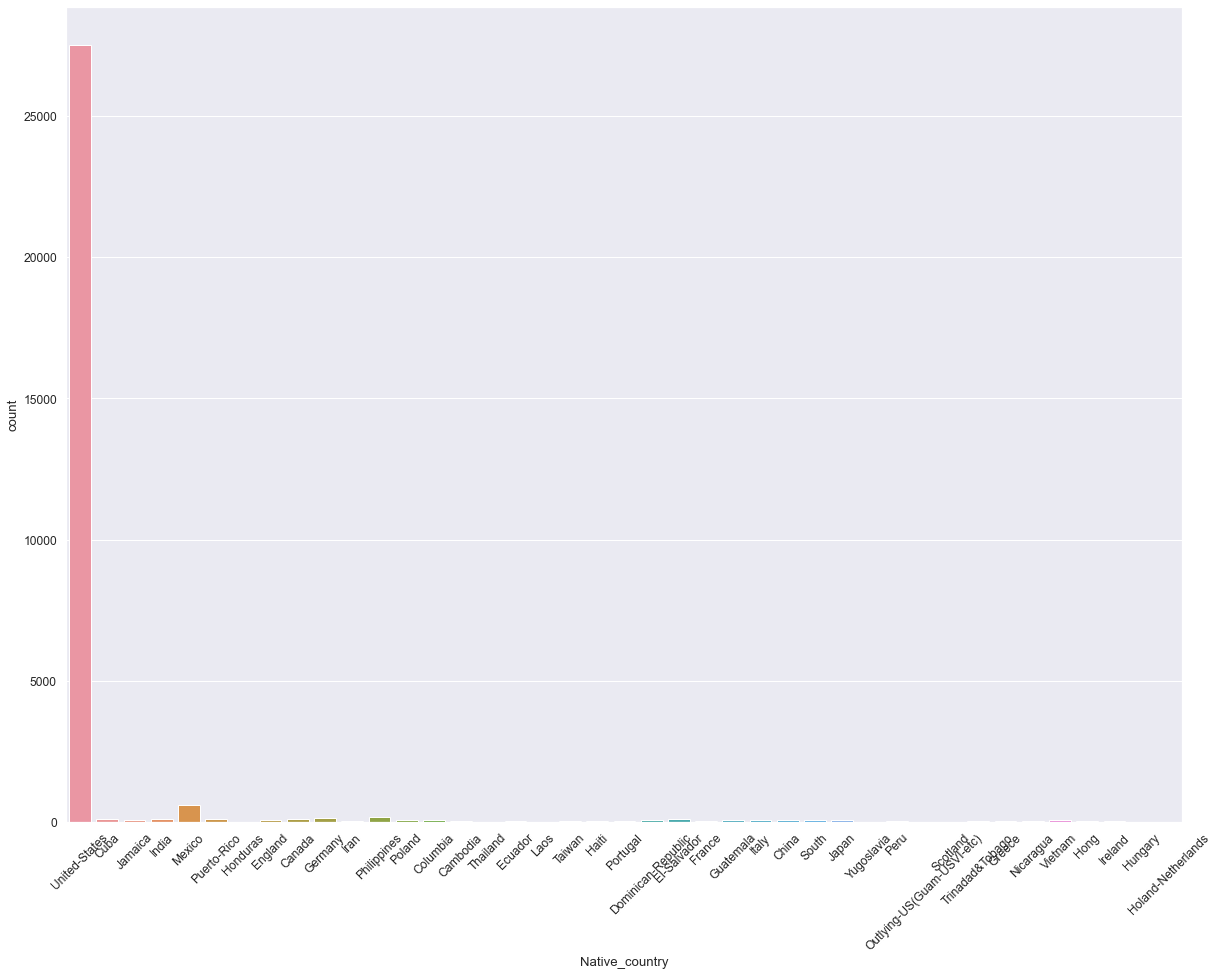

In [428]:
plt.figure(figsize=(20,15))
s=sns.countplot(data["Native_country"])
s.set_xticklabels(s.get_xticklabels(),rotation=45);


In [429]:
data["Native_country"].value_counts()

United-States                 27503
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Columbia                         56
Poland                           56
Taiwan                           42
Iran                             42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

**Maximum individual is from United States.**

### Income column

<AxesSubplot:xlabel='Income', ylabel='count'>

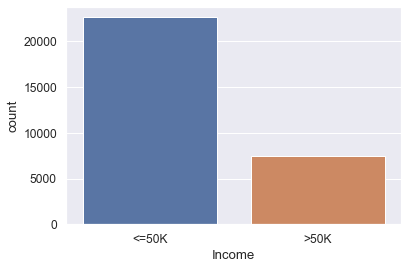

In [430]:
sns.countplot(data["Income"])

In [431]:
data["Income"].value_counts()

<=50K    22653
>50K      7508
Name: Income, dtype: int64

**We can interpret that maximum individual having salary less than 50k.**

## 7.2 Bivariate Analysis

### Income VS Age

<AxesSubplot:xlabel='Income', ylabel='Age'>

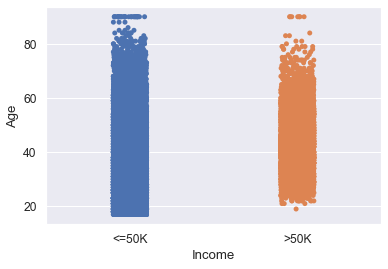

In [432]:
sns.stripplot(x="Income",y="Age",data=data)

**As we can easily interpret that income less than 50K and more than 50k with age variable is easily seperable and also having some outliers in Age.**

### Income VS Workclass

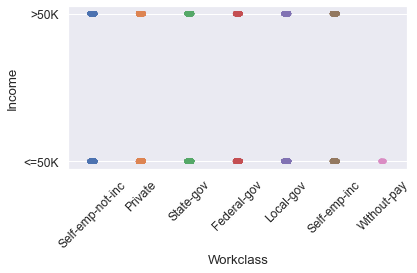

In [433]:
s=sns.stripplot(x="Workclass",y="Income",data=data,jitter=0.05)
plt.xticks(rotation=45)
plt.tight_layout()


** As we can see income and workclass is easily seperable.**

### Income VS Fnlwgt

<AxesSubplot:xlabel='Fnlwgt', ylabel='Income'>

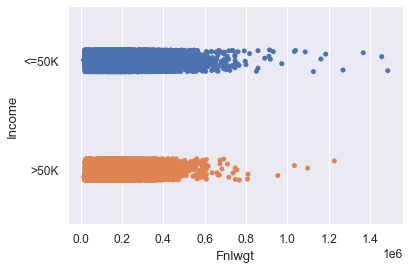

In [434]:
sns.stripplot(x="Fnlwgt",y="Income",data=data)

**As easily we can see Income target variable(dependent variable) and Fnlwt variable (independent variable) is easily seperable.**

### Income Vs Education

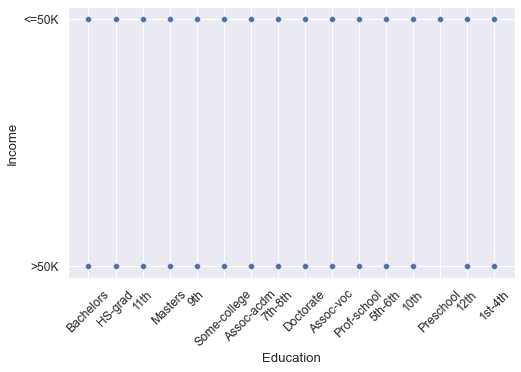

In [435]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Education",y="Income",data=data)
plt.xticks(rotation=45);

### Income Vs Marital_status

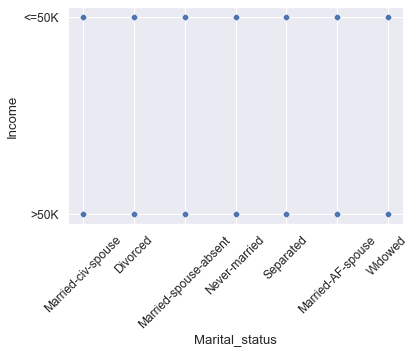

In [436]:
sns.scatterplot(x="Marital_status",y="Income",data=data)
plt.xticks(rotation=45);

### Income VS Occupation

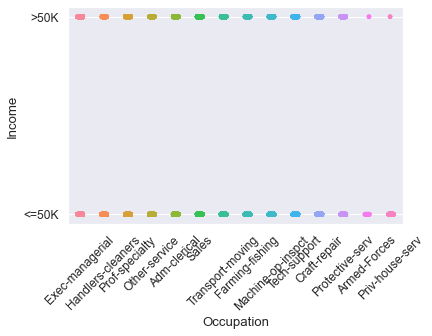

In [437]:
sns.stripplot(x="Occupation",y="Income",data=data)
plt.xticks(rotation=45);

### Income Vs Relationship`

<AxesSubplot:xlabel='Relationship', ylabel='Income'>

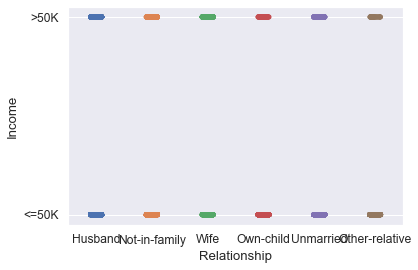

In [438]:
sns.stripplot(x="Relationship",y="Income",data=data)

<AxesSubplot:xlabel='Income', ylabel='Sex'>

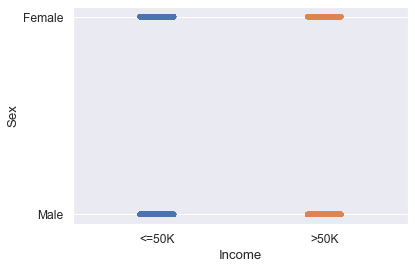

In [439]:
sns.stripplot(x="Income",y="Sex",data=data)

### Age VS Sex

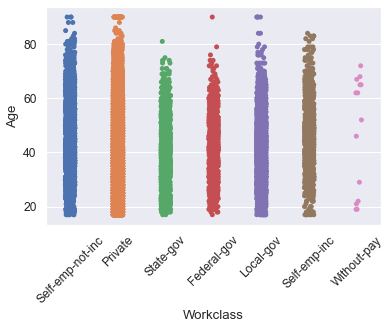

In [440]:
sns.stripplot(x="Workclass",y="Age",data=data,jitter=True)
plt.xticks(rotation=45);

**Here we can see the Age of individual with their workclass.**

### Age VS hours per week

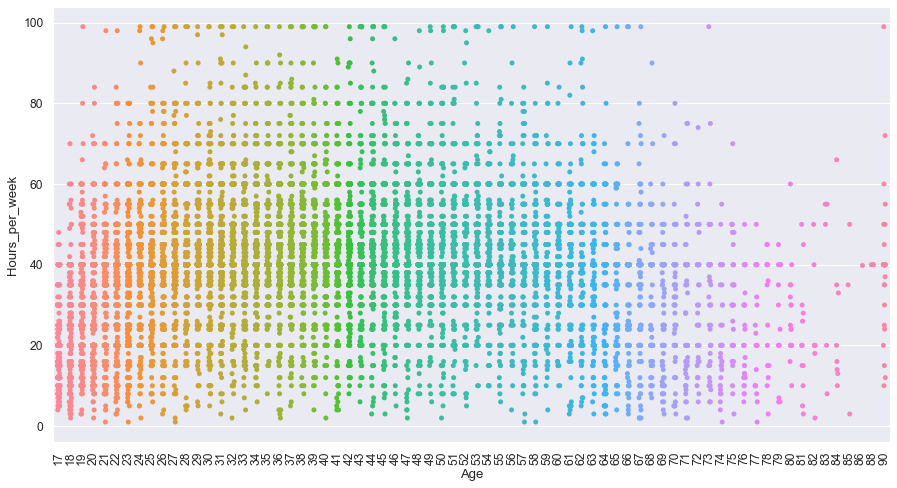

In [441]:
plt.figure(figsize=(15,8))
sns.stripplot(x="Age",y="Hours_per_week",data=data)
plt.xticks(rotation=90);

**We can interpret that maximum individual hours per week range from 38 to 58 hours between the age from 20 to 55 year old.**

### Age Vs Native_country

<AxesSubplot:xlabel='Age', ylabel='Native_country'>

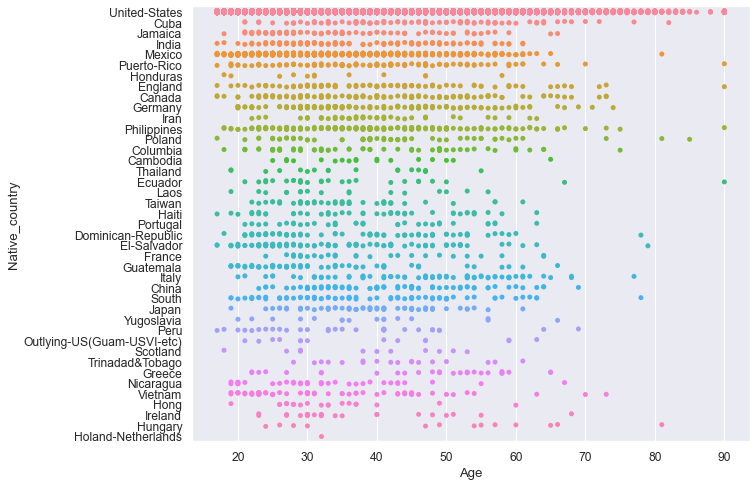

In [442]:
plt.figure(figsize=(10,8))
sns.stripplot(x="Age",y="Native_country",data=data)

**We can interpret that maximum age of individual is till 60 yrs old from accross all individual Native except some country like United States,Cuba,England,Canada,Germany,philippines.**

### Education Vs Occupation

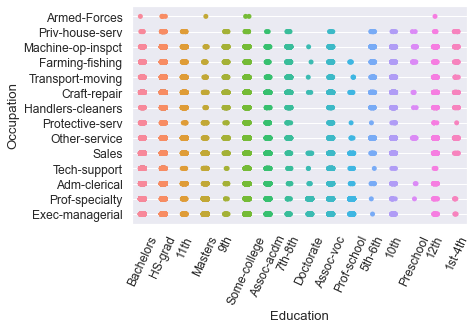

In [443]:
sns.stripplot(x="Education",y="Occupation",data=data)
plt.xticks(rotation=65);

**We can interpret that doctorate,preschool have very less occupation compare to others.**

## 7.3 Multivariate Analysis

### Age VS Workclass VS Income

<AxesSubplot:xlabel='Age', ylabel='Workclass'>

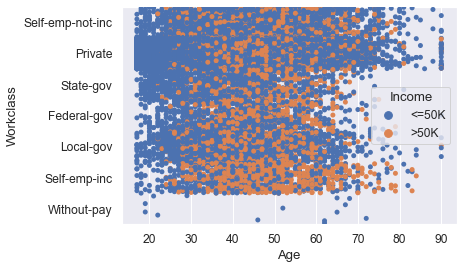

In [444]:
sns.stripplot(x="Age",y="Workclass",hue="Income",data=data,jitter=0.5)

**We can interpret that income more than 50k is between the age group of 35 to 65 yrs and maximum individual belong to self emp inc type of workclass.

### Age VS Hours per week VS Income

<AxesSubplot:xlabel='Age', ylabel='Hours_per_week'>

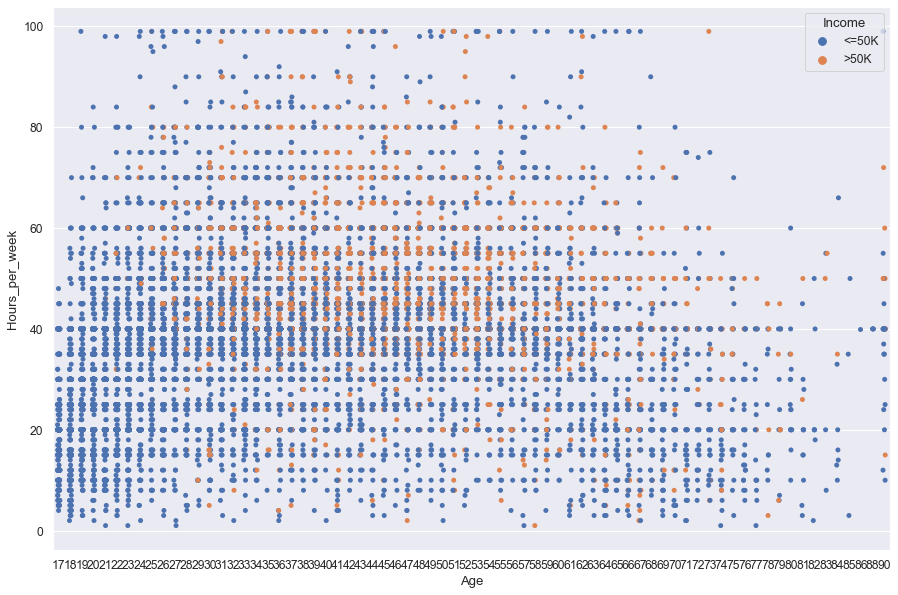

In [445]:
plt.figure(figsize=(15,10))
sns.stripplot(x="Age",y="Hours_per_week",hue="Income",data=data)

**We interpret in above plot that income is more than 50K individual are those who works 38 to 58 hours in a week.**

### Marital Status VS Occupation VS Income

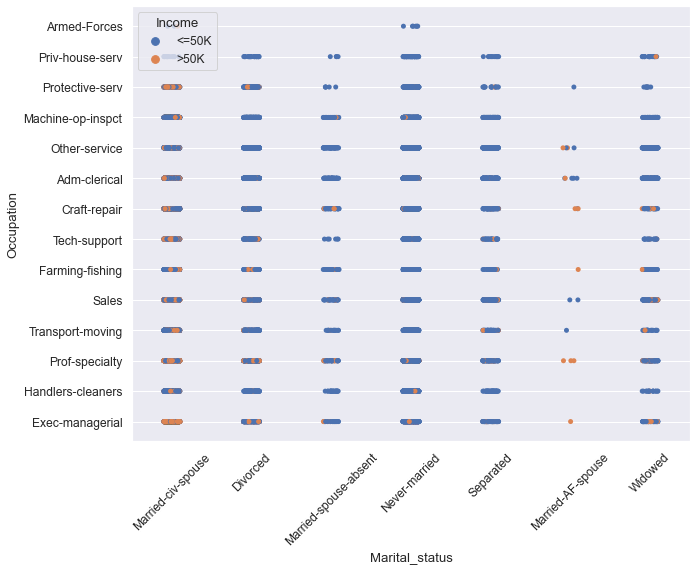

In [446]:
plt.figure(figsize=(10,8))
sns.stripplot(x="Marital_status",y="Occupation",hue="Income",data=data)
plt.xticks(rotation=45);

**We can see individual who earns more than 50k are married civil spouse and married Armed Force spouse with occupation of executive managerial occupation.**

### Fnlwgt VS Race VS Income

<AxesSubplot:xlabel='Fnlwgt', ylabel='Race'>

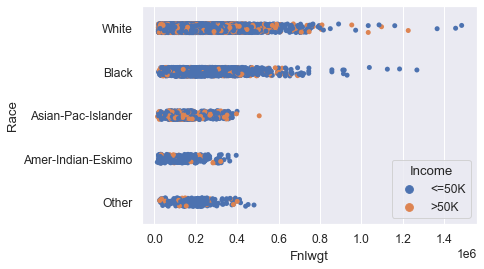

In [447]:
sns.stripplot(x="Fnlwgt",y="Race",hue="Income",data=data)

**Individual income more than 50k are maximum from White and Asian-PAc-Islander with fnlwgt between 0.11 to 0.50.**

Text(0.5, 1.0, 'Income Age Occupation')

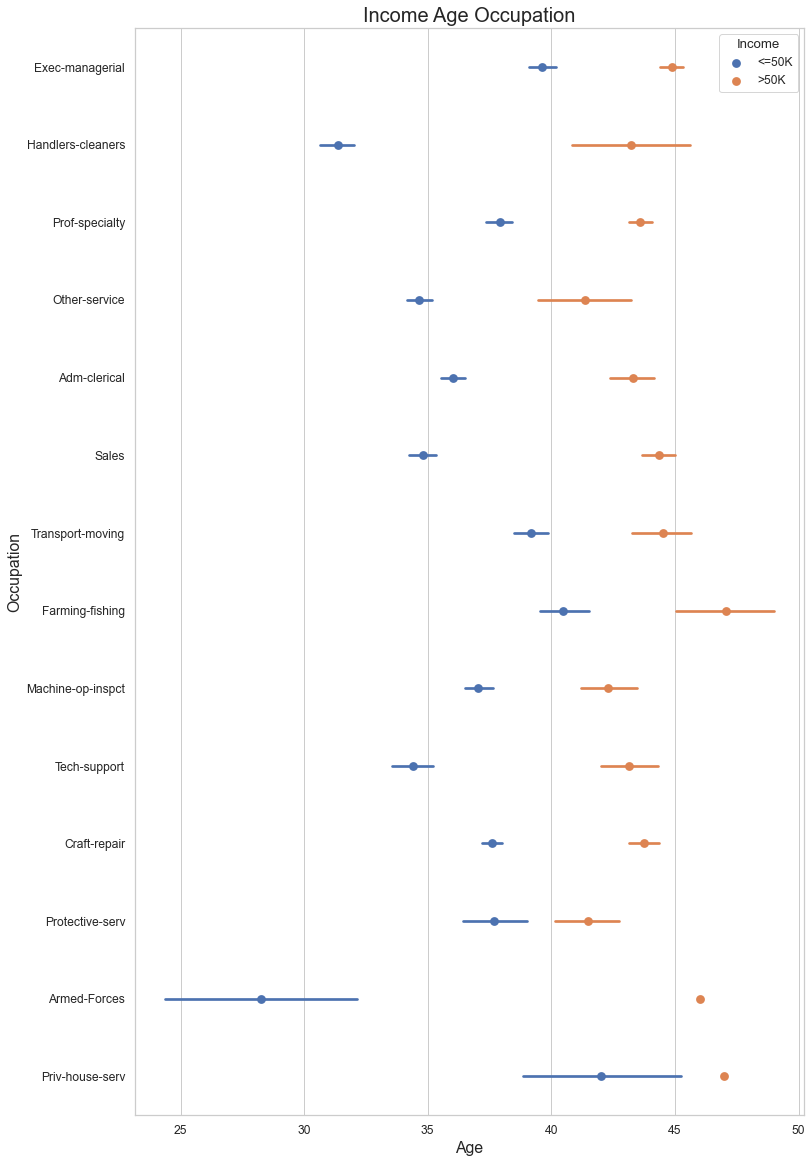

In [448]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='Age',y='Occupation',data=data, hue='Income',join=False)
plt.xlabel('Age',{'fontsize' : 'large'})
plt.ylabel('Occupation',{'fontsize':'large'})
plt.title("Income Age Occupation",{'fontsize':20})

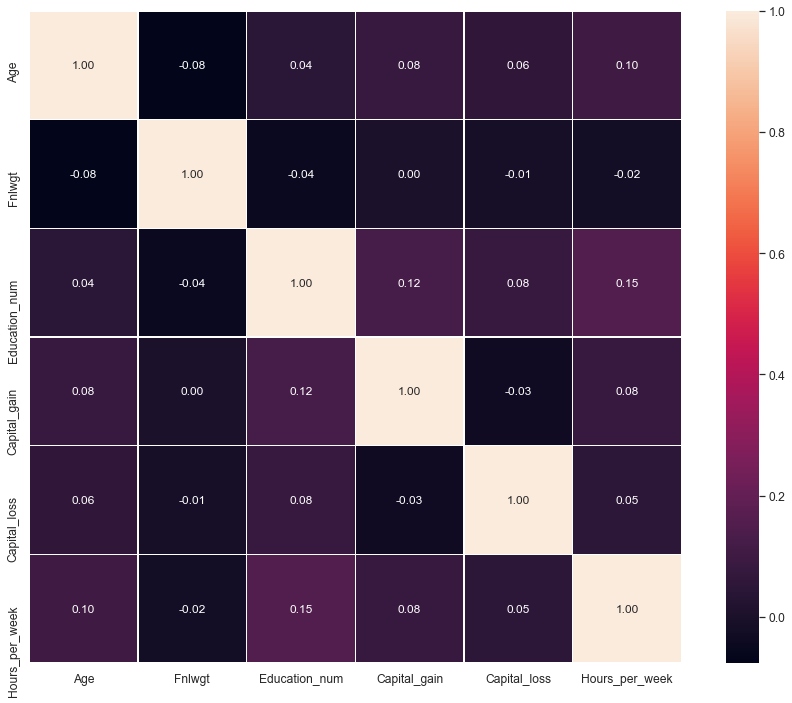

In [449]:
plt.subplots(figsize=(16,12))
cm=np.corrcoef(data[numeric_feat].values.T)
sns.set(font_scale=1.1)
heatmap=sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':12}, yticklabels = numeric_feat, xticklabels = numeric_feat,linewidths=.5)

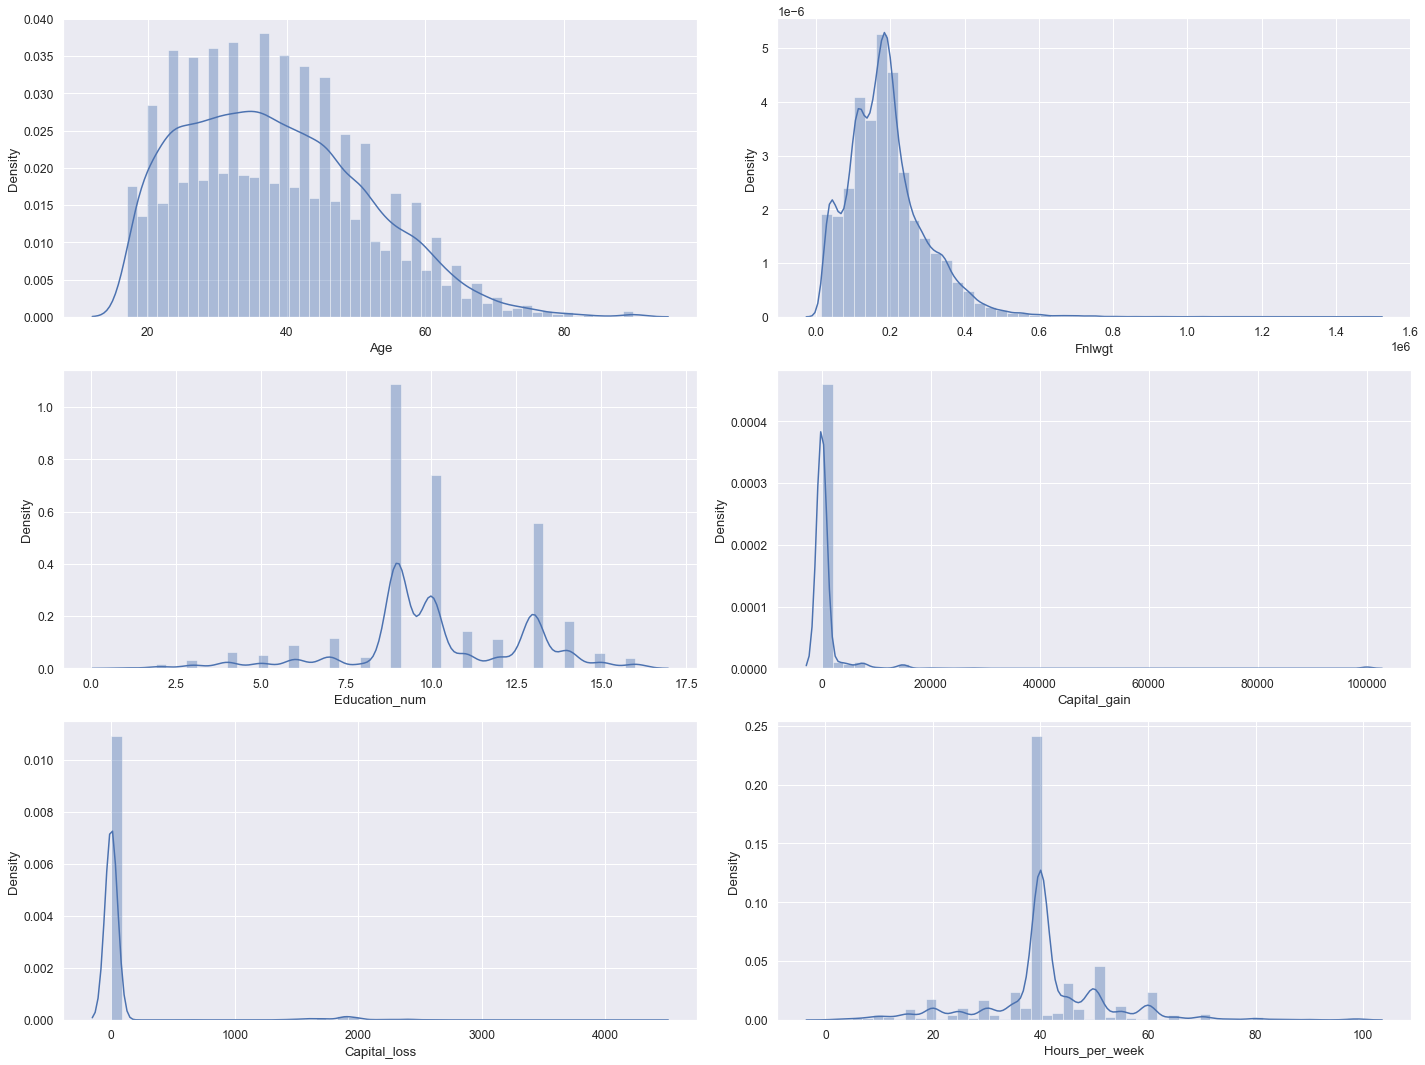

In [450]:
plt.figure(figsize=(20,15),facecolor="white")
plotnumber=1
for column in numeric_feat:
    if plotnumber <=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(data[column])
    plotnumber+=1
plt.tight_layout()

**Below are the observation:**
- Age data is normally distributed but having some outliers.

- Fnlwgt data distribution also having skeewed right side.

- Education_num distribution having left skeewed. this feature would not require for our model as already education feature has been consider.

- Captital gain and loss data distribution is higly skeewed right side.

- Hours per week data distribuition having both side skeewed.

# 8 Feature Engineering

**we will convert our categorical varible into numeric variable.**

In [451]:
categorical_feat

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

### Encoding Workclass feature with OneHotEncoder technique

In [452]:
data["Workclass"].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1278
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: Workclass, dtype: int64

In [453]:
from sklearn.preprocessing import OneHotEncoder

In [454]:
onehotencoder=OneHotEncoder()

In [455]:
x=onehotencoder.fit_transform(data.Workclass.values.reshape(-1,1)).toarray()

In [456]:
j=data["Workclass"].value_counts()

In [457]:
dfOnehot=pd.DataFrame(x,columns=["Workclass_"+str(i) for i in j.index])

In [458]:
data=pd.concat([data,dfOnehot],axis=1)

In [459]:
data.shape

(30161, 22)

In [460]:
data.drop(["Workclass"],axis=1,inplace=True)

### Encoding Education feature with Ordinal Encoding technique

In [461]:
data["Education"].value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5043
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: Education, dtype: int64

**As there are many catgories in Education so we will create new category till 12 and allocate the entry from 1st to 12th.**

In [462]:
new_cat=["1st-4th","5th-6th","7th-8th","9th","10th","11th","12th"]
till_12=[]
for cat in data["Education"]:
    if cat in new_cat:
        data.loc[data.Education==cat,"Education"]="till_12"

In [463]:
data["Education"].value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5043
till_12         3696
Masters         1627
Assoc-voc       1307
Assoc-acdm      1008
Prof-school      542
Doctorate        375
Preschool         45
Name: Education, dtype: int64

**Below are the education order**

**Preschool < till_ 12 < HS-grad < Prof-school < Assoc-acdm < Assoc-voc < Some-college < Bachelors < Masters < Doctorate**

In [464]:
from sklearn.preprocessing import OrdinalEncoder

In [465]:
enc=OrdinalEncoder(categories=[["Preschool","till_12","HS-grad","Prof-school","Assoc-acdm","Assoc-voc","Some-college","Bachelors","Masters","Doctorate"]])

In [466]:
z=enc.fit_transform(data.Education.values.reshape(-1,1))

In [467]:
data["Education"]=z

In [468]:
data.shape

(30161, 21)

In [469]:
data

,Age,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,...,Hours_per_week,Native_country,Income,Workclass_Private,Workclass_Self-emp-not-inc,Workclass_Local-gov,Workclass_State-gov,Workclass_Self-emp-inc,Workclass_Federal-gov,Workclass_Without-pay
0,50,83311,7.0,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,13,United-States,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,215646,2.0,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,40,United-States,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,53,234721,1.0,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,40,United-States,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,28,338409,7.0,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,40,Cuba,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,37,284582,8.0,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,...,40,United-States,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,257302,4.0,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,...,38,United-States,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30157,40,154374,2.0,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,...,40,United-States,>50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30158,58,151910,2.0,9,Widowed,Adm-clerical,Unmarried,White,Female,0,...,40,United-States,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30159,22,201490,2.0,9,Never-married,Adm-clerical,Own-child,White,Male,0,...,20,United-States,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Encoding Marital status feature with One Hot Encoding technique

In [470]:
data["Marital_status"].value_counts()

Married-civ-spouse       14065
Never-married             9725
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: Marital_status, dtype: int64

In [471]:
x=onehotencoder.fit_transform(data.Marital_status.values.reshape(-1,1)).toarray()

In [472]:
j=data["Marital_status"].value_counts()

In [473]:
dfOnehot=pd.DataFrame(x,columns=["Marital_status"+str(i) for i in j.index])

In [474]:
data=pd.concat([data,dfOnehot],axis=1)

In [475]:
data.shape

(30161, 28)

In [476]:
data.drop("Marital_status",axis=1,inplace=True)

In [477]:
data.shape

(30161, 27)

###  Encoding Occupation feature with OneHotEncoder technique

In [478]:
data["Occupation"].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3720
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: Occupation, dtype: int64

In [479]:
x=onehotencoder.fit_transform(data.Occupation.values.reshape(-1,1)).toarray()
j=data["Occupation"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["Occupation"+str(i) for i in j.index])

In [480]:
data=pd.concat([data,dfOnehot],axis=1)

In [481]:
data.shape

(30161, 41)

In [482]:
data.drop("Occupation",axis=1,inplace=True)

In [483]:
data

,Age,Fnlwgt,Education,Education_num,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,...,OccupationSales,OccupationOther-service,OccupationMachine-op-inspct,OccupationTransport-moving,OccupationHandlers-cleaners,OccupationFarming-fishing,OccupationTech-support,OccupationProtective-serv,OccupationPriv-house-serv,OccupationArmed-Forces
0,50,83311,7.0,13,Husband,White,Male,0,0,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38,215646,2.0,9,Not-in-family,White,Male,0,0,40,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53,234721,1.0,7,Husband,Black,Male,0,0,40,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,338409,7.0,13,Wife,Black,Female,0,0,40,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,37,284582,8.0,14,Wife,White,Female,0,0,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,257302,4.0,12,Wife,White,Female,0,0,38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30157,40,154374,2.0,9,Husband,White,Male,0,0,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30158,58,151910,2.0,9,Unmarried,White,Female,0,0,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30159,22,201490,2.0,9,Own-child,White,Male,0,0,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [484]:
categorical_feat

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

###  Encoding Relationship feature with OneHotEncoder technique

In [485]:
data["Relationship"].value_counts()

Husband           12463
Not-in-family      7725
Own-child          4466
Unmarried          3212
Wife               1406
Other-relative      889
Name: Relationship, dtype: int64

In [486]:
x=onehotencoder.fit_transform(data.Relationship.values.reshape(-1,1)).toarray()
j=data["Relationship"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["Relationship"+str(i) for i in j.index])

In [487]:
data=pd.concat([data,dfOnehot],axis=1)

In [488]:
data.shape

(30161, 46)

In [489]:
data.drop("Relationship",axis=1,inplace=True)

In [490]:
data

,Age,Fnlwgt,Education,Education_num,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,...,OccupationTech-support,OccupationProtective-serv,OccupationPriv-house-serv,OccupationArmed-Forces,RelationshipHusband,RelationshipNot-in-family,RelationshipOwn-child,RelationshipUnmarried,RelationshipWife,RelationshipOther-relative
0,50,83311,7.0,13,White,Male,0,0,13,United-States,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,38,215646,2.0,9,White,Male,0,0,40,United-States,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,53,234721,1.0,7,Black,Male,0,0,40,United-States,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,28,338409,7.0,13,Black,Female,0,0,40,Cuba,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,37,284582,8.0,14,White,Female,0,0,40,United-States,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,257302,4.0,12,White,Female,0,0,38,United-States,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30157,40,154374,2.0,9,White,Male,0,0,40,United-States,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30158,58,151910,2.0,9,White,Female,0,0,40,United-States,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30159,22,201490,2.0,9,White,Male,0,0,20,United-States,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


###  Encoding Race feature with OneHotEncoder technique

In [491]:
data["Race"].value_counts()

White                 25932
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: Race, dtype: int64

In [492]:
x=onehotencoder.fit_transform(data.Race.values.reshape(-1,1)).toarray()
j=data["Race"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["Race"+str(i) for i in j.index])

In [493]:
data=pd.concat([data,dfOnehot],axis=1)

In [494]:
data.shape

(30161, 50)

In [495]:
data.drop("Race",axis=1,inplace=True)

In [496]:
data

,Age,Fnlwgt,Education,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,...,RelationshipNot-in-family,RelationshipOwn-child,RelationshipUnmarried,RelationshipWife,RelationshipOther-relative,RaceWhite,RaceBlack,RaceAsian-Pac-Islander,RaceAmer-Indian-Eskimo,RaceOther
0,50,83311,7.0,13,Male,0,0,13,United-States,<=50K,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,38,215646,2.0,9,Male,0,0,40,United-States,<=50K,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,53,234721,1.0,7,Male,0,0,40,United-States,<=50K,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28,338409,7.0,13,Female,0,0,40,Cuba,<=50K,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,37,284582,8.0,14,Female,0,0,40,United-States,<=50K,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,257302,4.0,12,Female,0,0,38,United-States,<=50K,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
30157,40,154374,2.0,9,Male,0,0,40,United-States,>50K,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30158,58,151910,2.0,9,Female,0,0,40,United-States,<=50K,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
30159,22,201490,2.0,9,Male,0,0,20,United-States,<=50K,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Encoding Sex feature with Label Encoder technique

In [497]:
data["Sex"].value_counts()

Male      20379
Female     9782
Name: Sex, dtype: int64

In [498]:
from sklearn.preprocessing import LabelEncoder

In [499]:
lab_enc=LabelEncoder()

In [500]:
z=lab_enc.fit_transform(data.Sex.values.reshape(-1,1))

In [501]:
data["Sex"]=z

In [502]:
data

,Age,Fnlwgt,Education,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,...,RelationshipNot-in-family,RelationshipOwn-child,RelationshipUnmarried,RelationshipWife,RelationshipOther-relative,RaceWhite,RaceBlack,RaceAsian-Pac-Islander,RaceAmer-Indian-Eskimo,RaceOther
0,50,83311,7.0,13,1,0,0,13,United-States,<=50K,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,38,215646,2.0,9,1,0,0,40,United-States,<=50K,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,53,234721,1.0,7,1,0,0,40,United-States,<=50K,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28,338409,7.0,13,0,0,0,40,Cuba,<=50K,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,37,284582,8.0,14,0,0,0,40,United-States,<=50K,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,257302,4.0,12,0,0,0,38,United-States,<=50K,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
30157,40,154374,2.0,9,1,0,0,40,United-States,>50K,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30158,58,151910,2.0,9,0,0,0,40,United-States,<=50K,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
30159,22,201490,2.0,9,1,0,0,20,United-States,<=50K,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


###  Encoding Native_country feature with OneHotEncoder technique

In [503]:
data["Native_country"].value_counts()

United-States                 27503
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Columbia                         56
Poland                           56
Taiwan                           42
Iran                             42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

**As there are many country in Native_country features so we have grouped in following business region to avoid complexity.**
- APAC: Asia-Pacific
- EMEA: Europe, the Middle East and Africa
- LATAM: Latin America
- NA: North America

In [504]:
APAC1=["Philippines","India","China","Vietnam","Japan","Columbia","Taiwan","Hong","Cambodia","Laos","Thailand","Outlying-US(Guam-USVI-etc)"]
EMEA1=["Germany","South","Italy","Poland","Iran","Portugal","Greece","France","Ireland","Yugoslavia","Hungary","Scotland","Holand-Netherlands","England"]
LATAM1=["Mexico","Puerto-Rico","El-Salvador","Cuba","Jamaica","Dominican-Republic","Guatemala","Haiti","Nicaragua","Peru","Ecuador","Trinadad&Tobago","Honduras"]
NA1=["United-States","Canada"]


for country in data["Native_country"]:
    if country in APAC1:
        data.loc[data.Native_country ==country,"Native_country"]="APAC"
    if country in EMEA1:
        data.loc[data.Native_country ==country,"Native_country"]="EMEA"
    if country in LATAM1:
        data.loc[data.Native_country ==country,"Native_country"]="LATAM"
    if country in NA1:
        data.loc[data.Native_country ==country,"Native_country"]="NA"
        

In [505]:
data["Native_country"].value_counts()

NA       27610
LATAM     1283
APAC       662
EMEA       606
Name: Native_country, dtype: int64

In [506]:
x=onehotencoder.fit_transform(data.Native_country.values.reshape(-1,1)).toarray()
j=data["Native_country"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["Native_country"+str(i) for i in j.index])

In [507]:
data=pd.concat([data,dfOnehot],axis=1)

In [508]:
data.shape

(30161, 53)

In [509]:
data.drop("Native_country",axis=1,inplace=True)

In [510]:
data

,Age,Fnlwgt,Education,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_Private,...,RelationshipOther-relative,RaceWhite,RaceBlack,RaceAsian-Pac-Islander,RaceAmer-Indian-Eskimo,RaceOther,Native_countryNA,Native_countryLATAM,Native_countryAPAC,Native_countryEMEA
0,50,83311,7.0,13,1,0,0,13,<=50K,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,38,215646,2.0,9,1,0,0,40,<=50K,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,53,234721,1.0,7,1,0,0,40,<=50K,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,28,338409,7.0,13,0,0,0,40,<=50K,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,37,284582,8.0,14,0,0,0,40,<=50K,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,257302,4.0,12,0,0,0,38,<=50K,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
30157,40,154374,2.0,9,1,0,0,40,>50K,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
30158,58,151910,2.0,9,0,0,0,40,<=50K,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
30159,22,201490,2.0,9,1,0,0,20,<=50K,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [511]:
data.shape

(30161, 52)

**As we can see after applying one hot encoder the feature has converted into numeric and having total 97 feature.**

# 9.Converting Target label.

<AxesSubplot:xlabel='Income', ylabel='count'>

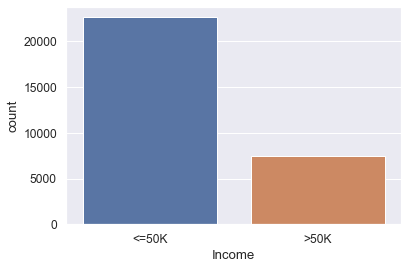

In [512]:
sns.countplot(data["Income"])

In [513]:
data["Income"].value_counts()

<=50K    22653
>50K      7508
Name: Income, dtype: int64

In [514]:
data.loc[data["Income"]=="<=50K","Income"]=0

In [515]:
data.loc[data["Income"]==">50K","Income"]=1

In [516]:
data["Income"].value_counts()

0    22653
1     7508
Name: Income, dtype: int64

# 10 Dealing Inbalanced Data-Target Label

<AxesSubplot:xlabel='Income', ylabel='count'>

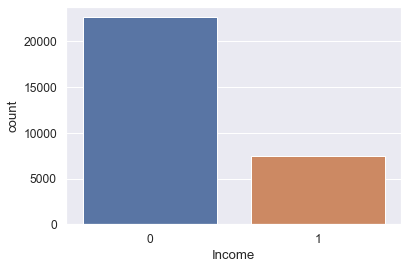

In [517]:
sns.countplot(data["Income"])

In [518]:
class_count_0,class_count_1=data["Income"].value_counts()

In [519]:
#Seperate class
class_0=data[data["Income"]==0]
class_1=data[data["Income"]==1]

In [520]:
print("class 0:",class_0.shape)
print("class 1:",class_1.shape)

class 0: (22653, 52)
class 1: (7508, 52)


**Here we will use oversampling method becuase undersampling would remove lot of rows which could lead to loss of information.**

In [521]:
class_1_over=class_1.sample(class_count_0,replace=True)
test_over=pd.concat([class_1_over,class_0],axis=0)
print("total class of 1 and 0:",test_over["Income"].value_counts())

total class of 1 and 0: 0    22653
1    22653
Name: Income, dtype: int64


In [522]:
data=pd.DataFrame(test_over)

<AxesSubplot:title={'center':'count(target)'}>

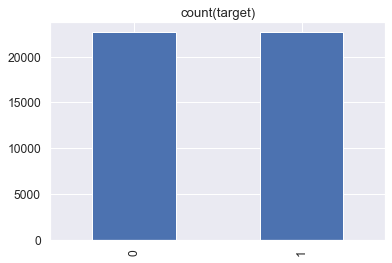

In [523]:
test_over["Income"].value_counts().plot(kind="bar",title="count(target)")

In [524]:
data["Income"].value_counts()

0    22653
1    22653
Name: Income, dtype: int64

In [525]:
data.shape

(45306, 52)

In [526]:
data.reset_index(drop=True,inplace=True)

In [527]:
data.shape

(45306, 52)

# 11. Checking Outliers

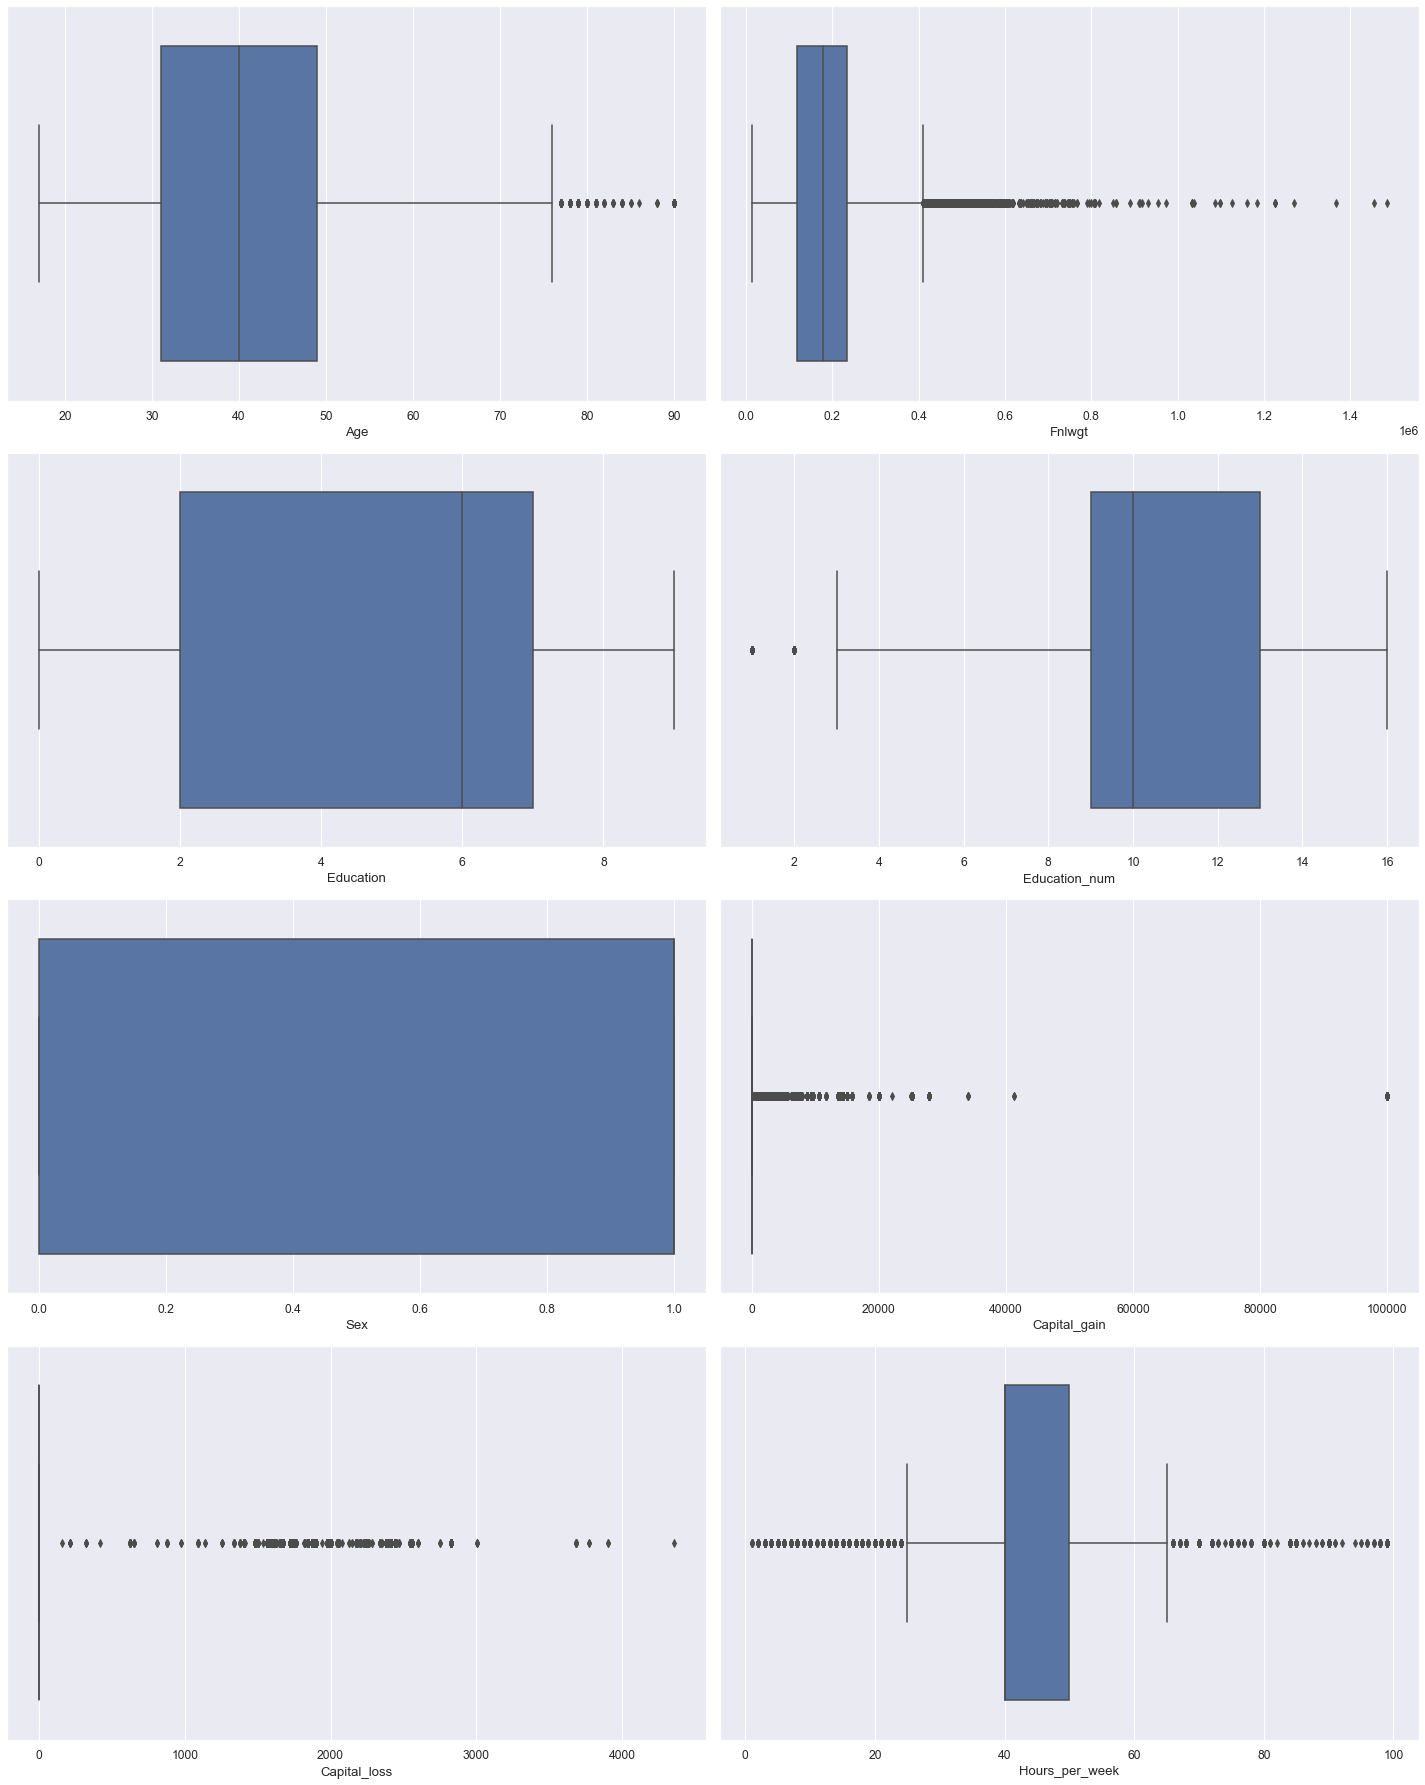

In [528]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data[0:8]:
    if plotnumber <=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(data[column],orient="v")
    plotnumber+=1
plt.tight_layout()

**Below are the observation of feature where all the below featues having outlier issue.**
- Age
- Fnlwgt
- Education_num
- Capital_gain
- Capital_loss
- Hours_per_week

# 12. Checking Skewness

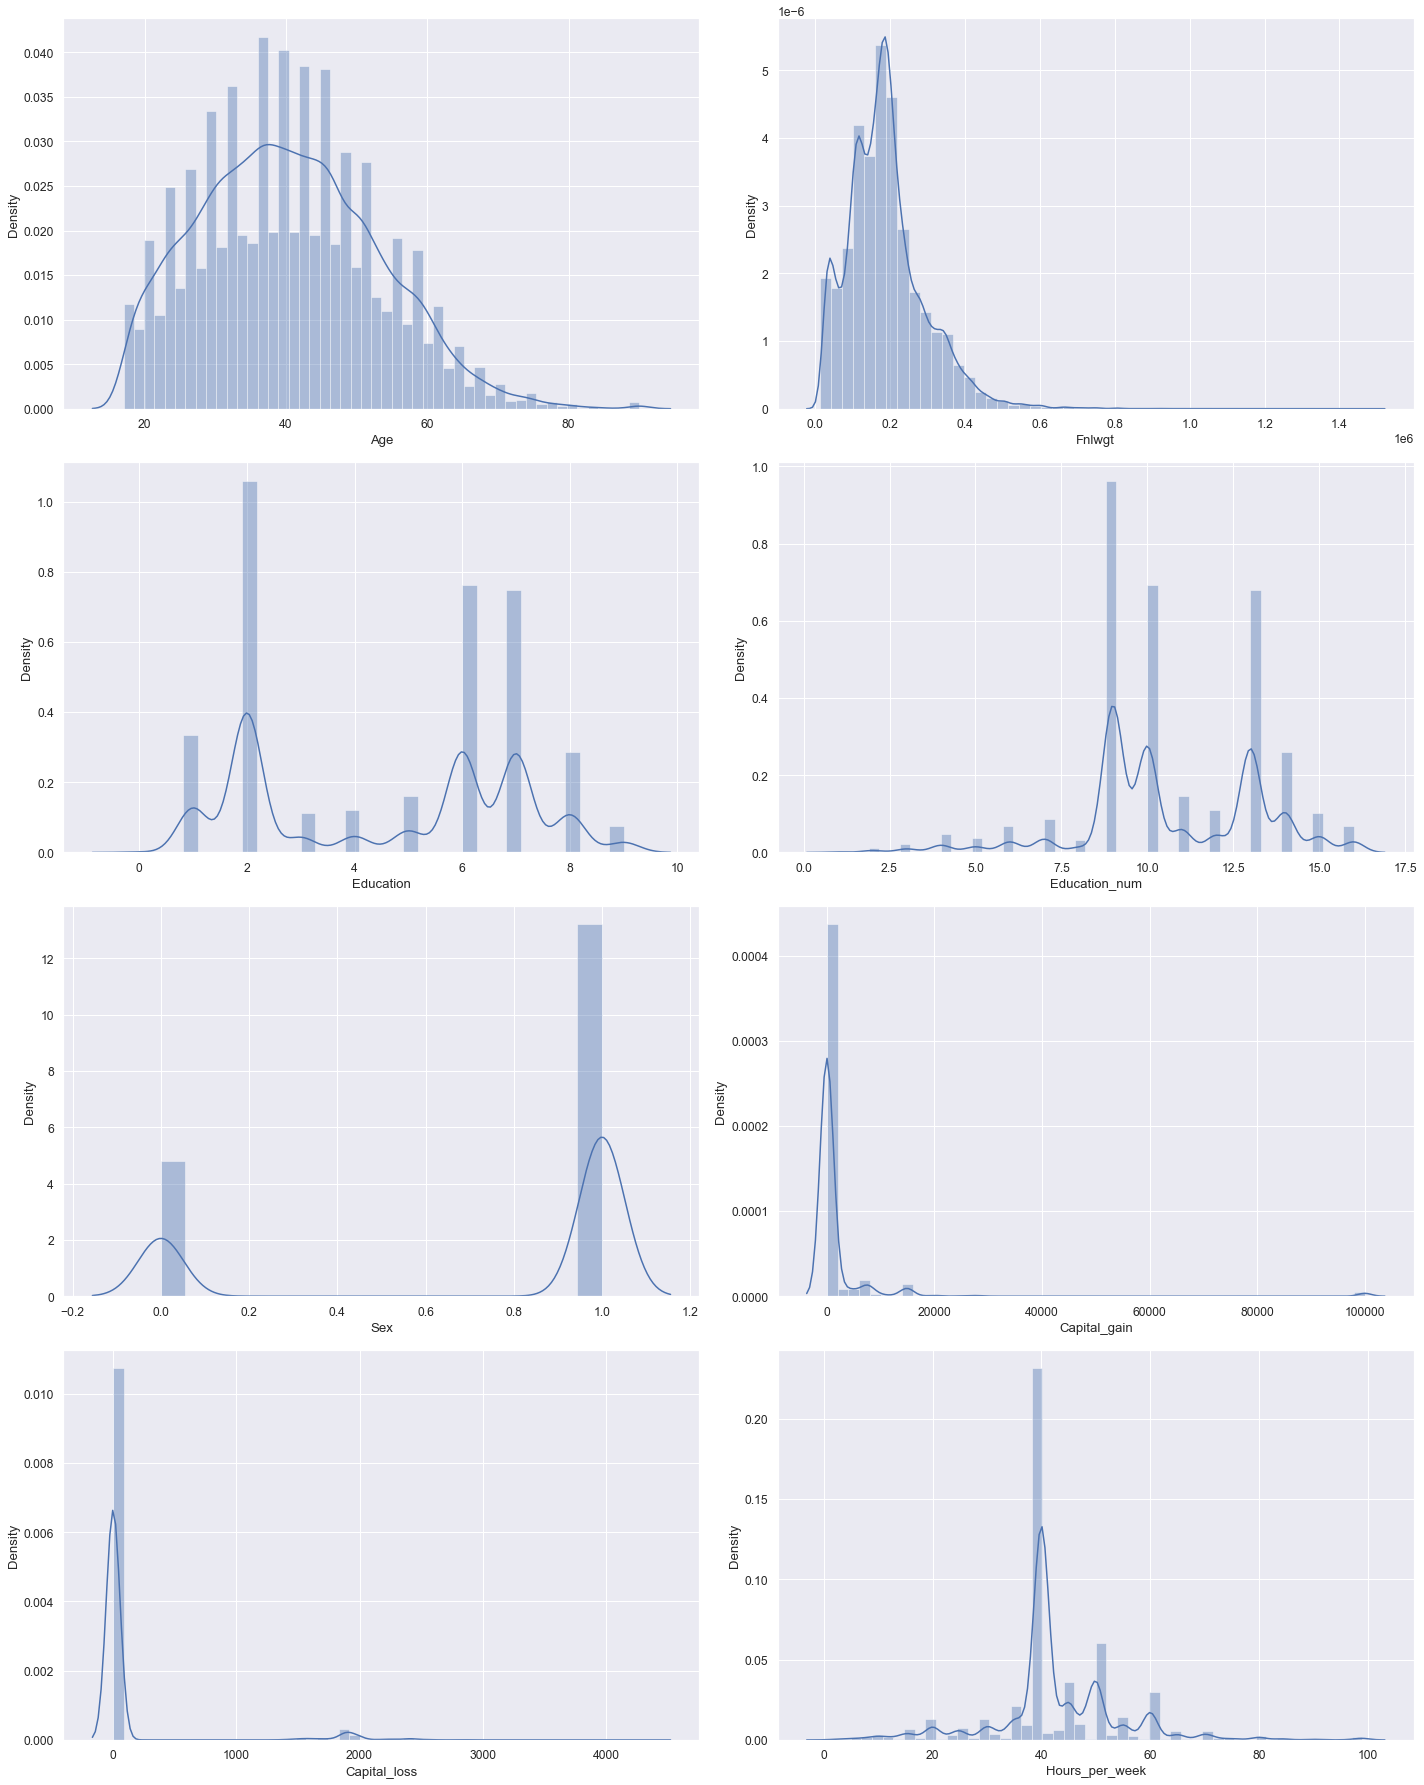

In [529]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data[0:8]:
    if plotnumber <=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(data[column])
    plotnumber+=1
plt.tight_layout()

**Below are the observation:**
- Age features data is little skeewed right side
- Fnlwgt feature data also right side skeewed
- Education num having left skeewed data.
- Capital_gain and Capital_loss both are highly right skeweed data
- Hours per week having both side skeewed data.

# 13. Removing Outlier with Zscore techinque

In [530]:
data.shape

(45306, 52)

### Dealing with Fnlwgt

<AxesSubplot:xlabel='Fnlwgt'>

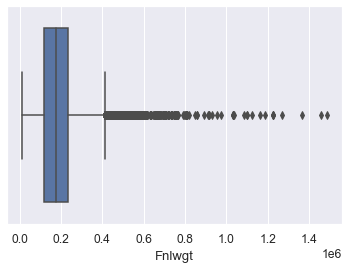

In [535]:
sns.boxplot(data["Fnlwgt"])

In [536]:
upper_limit=data["Fnlwgt"].mean()+3*data["Fnlwgt"].std()
lower_limit=data["Fnlwgt"].mean()-3*data["Fnlwgt"].std()

data["Fnlwgt"]=np.where(data["Fnlwgt"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["Fnlwgt"]<lower_limit,
                           lower_limit,
                           data["Fnlwgt"]
                        )
                    )

<AxesSubplot:xlabel='Fnlwgt'>

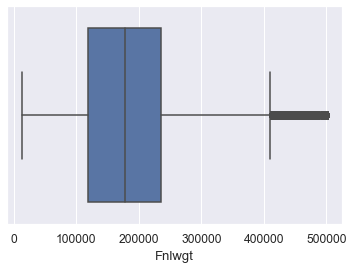

In [537]:
sns.boxplot(data["Fnlwgt"])

### Dealing with Education num

<AxesSubplot:xlabel='Education_num'>

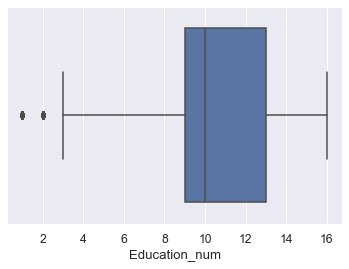

In [538]:
sns.boxplot(data["Education_num"])

In [539]:
upper_limit=data["Education_num"].mean()+3*data["Education_num"].std()
lower_limit=data["Education_num"].mean()-3*data["Education_num"].std()

data["Education_num"]=np.where(data["Education_num"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["Education_num"]<lower_limit,
                           lower_limit,
                           data["Education_num"]
                        )
                    )

<AxesSubplot:xlabel='Education_num'>

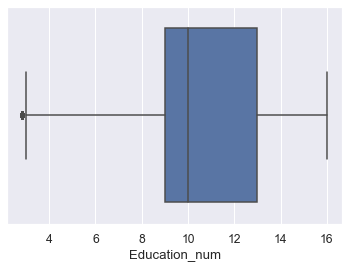

In [540]:
sns.boxplot(data["Education_num"])

### Dealing with Capital_gain

<AxesSubplot:xlabel='Capital_gain'>

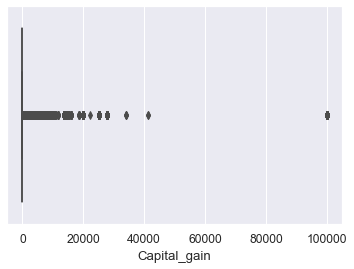

In [541]:
sns.boxplot(data["Capital_gain"])

In [542]:
upper_limit=data["Capital_gain"].mean()+3*data["Capital_gain"].std()
lower_limit=data["Capital_gain"].mean()-3*data["Capital_gain"].std()

data["Capital_gain"]=np.where(data["Capital_gain"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["Capital_gain"]<lower_limit,
                           lower_limit,
                           data["Capital_gain"]
                        )
                    )

<AxesSubplot:xlabel='Capital_gain'>

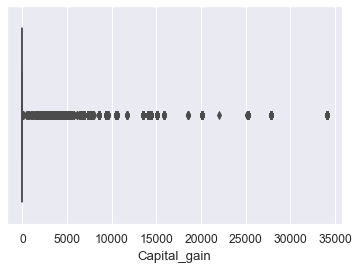

In [543]:
sns.boxplot(data["Capital_gain"])

### Dealing with Capital loss

<AxesSubplot:xlabel='Capital_loss'>

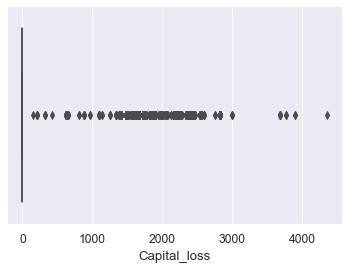

In [544]:
sns.boxplot(data["Capital_loss"])

In [545]:
upper_limit=data["Capital_loss"].mean()+3*data["Capital_loss"].std()
lower_limit=data["Capital_loss"].mean()-3*data["Capital_loss"].std()

data["Capital_loss"]=np.where(data["Capital_loss"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["Capital_loss"]<lower_limit,
                           lower_limit,
                           data["Capital_loss"]
                        )
                    )

<AxesSubplot:xlabel='Capital_loss'>

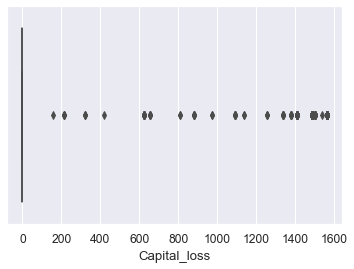

In [546]:
sns.boxplot(data["Capital_loss"])

### Dealing with hours per week

<AxesSubplot:xlabel='Hours_per_week'>

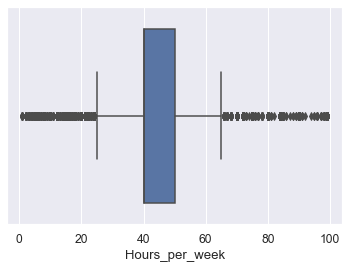

In [547]:
sns.boxplot(data["Hours_per_week"])

In [548]:
upper_limit=data["Hours_per_week"].mean()+3*data["Hours_per_week"].std()
lower_limit=data["Hours_per_week"].mean()-3*data["Hours_per_week"].std()

data["Hours_per_week"]=np.where(data["Hours_per_week"]>upper_limit,
                        upper_limit,
                        np.where(
                        data["Hours_per_week"]<lower_limit,
                        lower_limit,
                        data["Hours_per_week"]
                        )
                    )

<AxesSubplot:xlabel='Hours_per_week'>

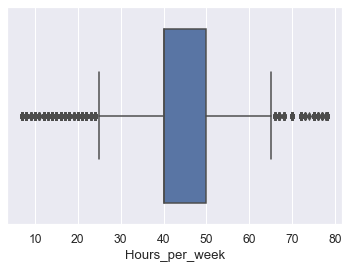

In [549]:
sns.boxplot(data["Hours_per_week"])

# 14. Treating data Skewness

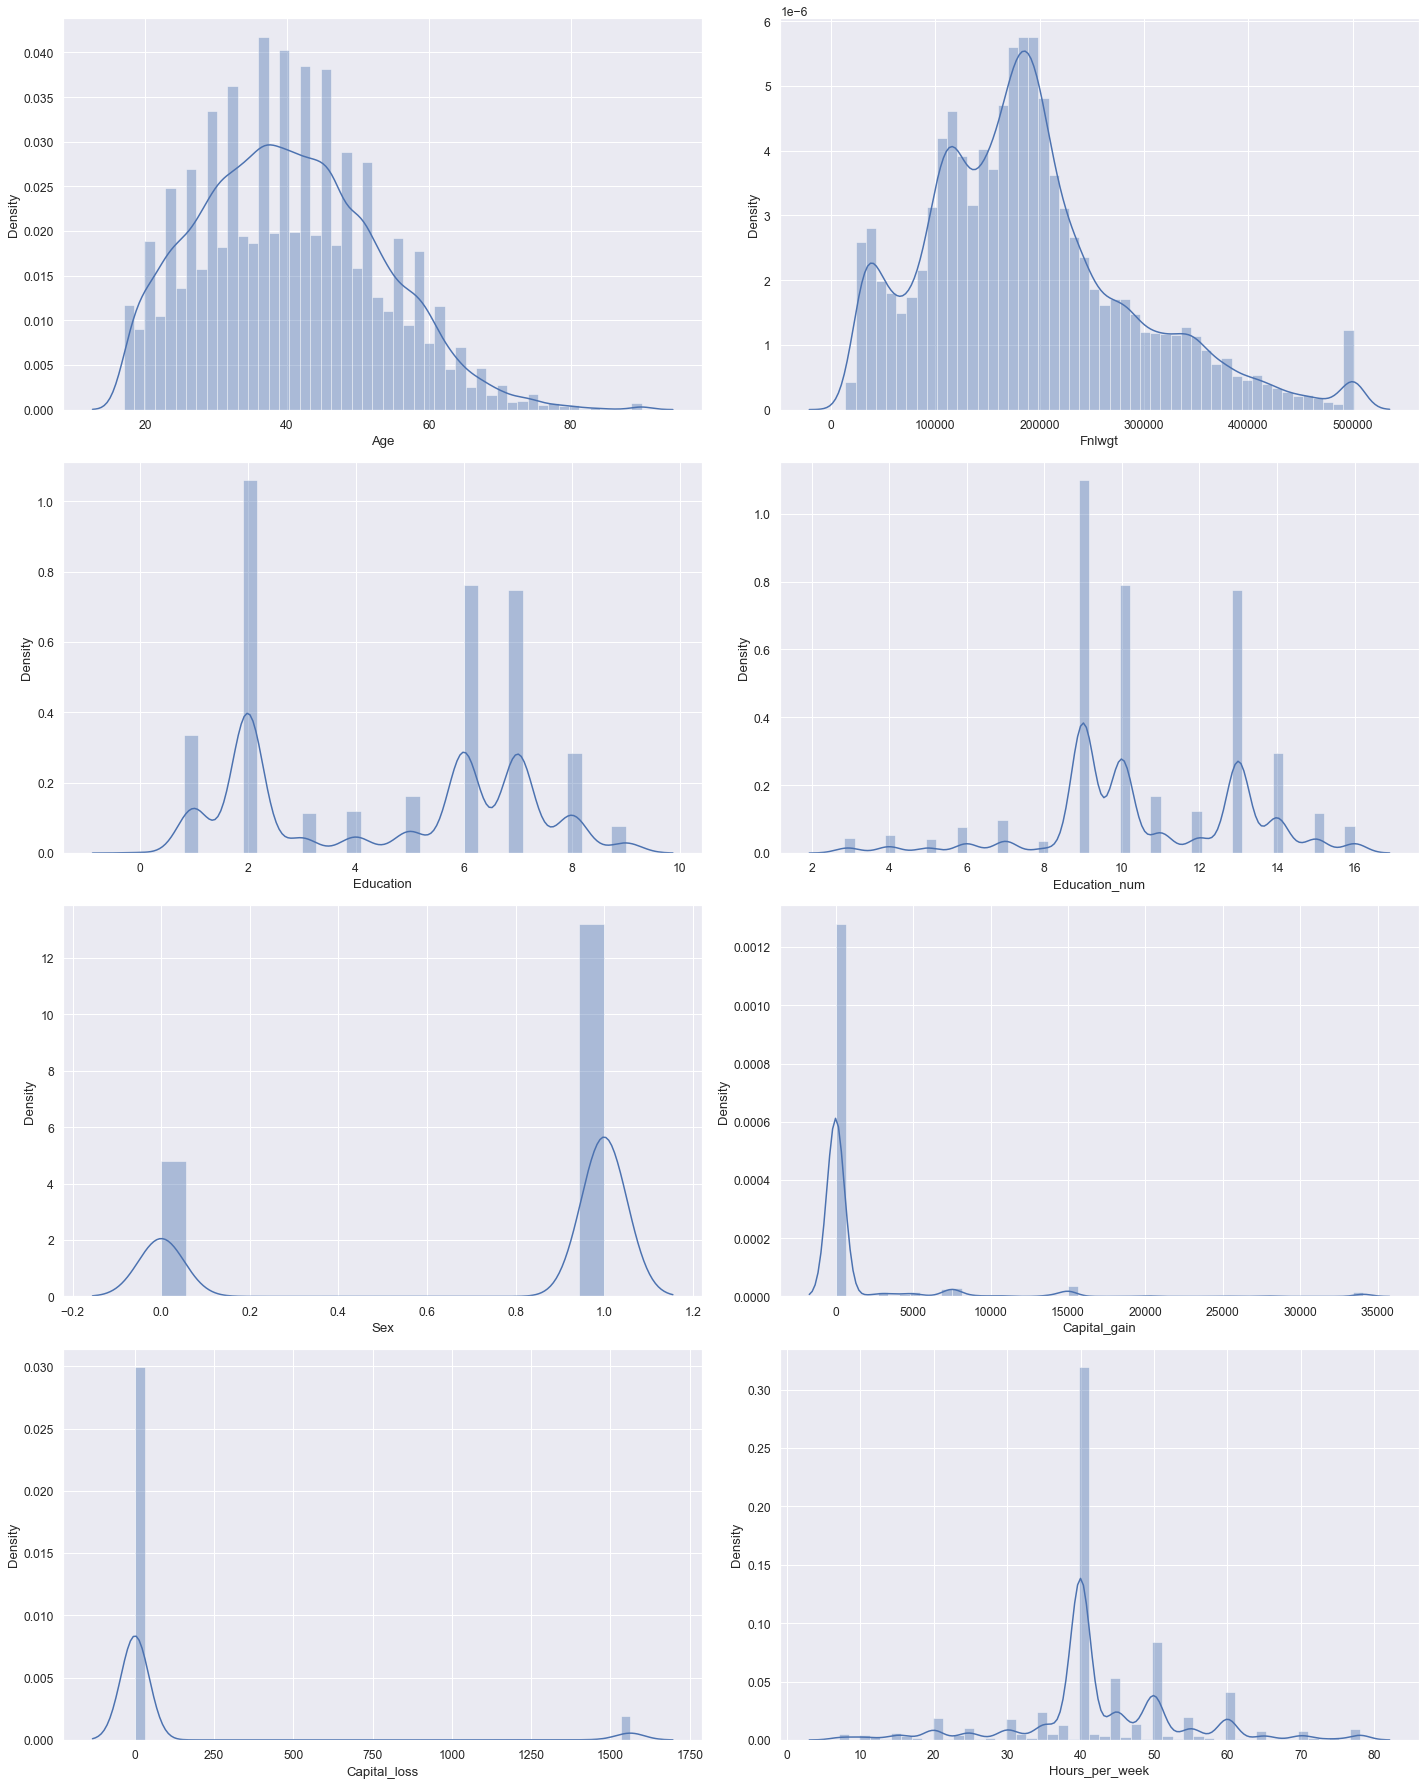

In [550]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data[0:8]:
    if plotnumber <=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(data[column])
    plotnumber+=1
plt.tight_layout()

In [551]:
for col in data[0:8]:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

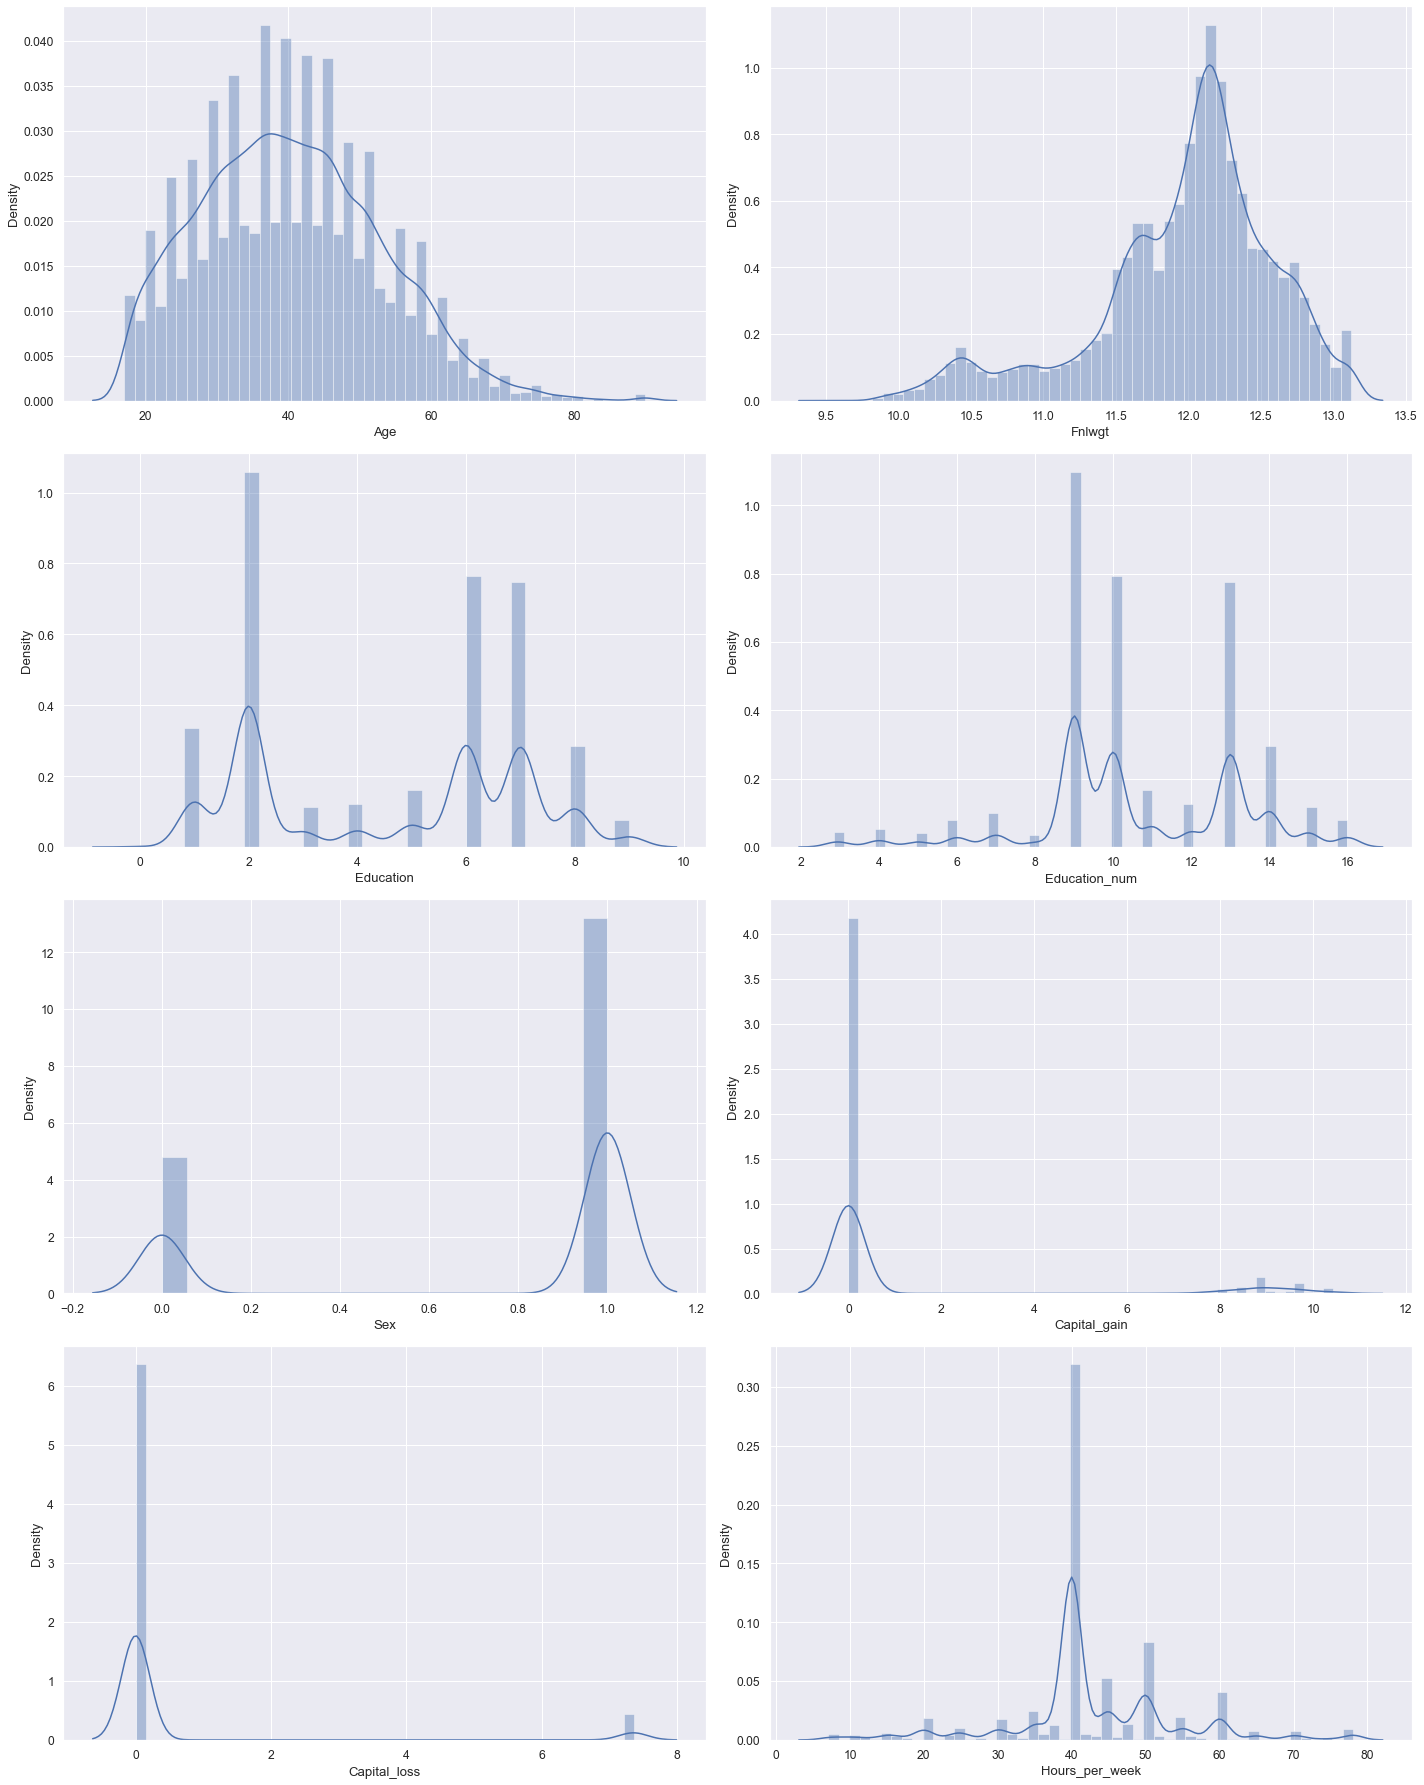

In [552]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data[0:8]:
    if plotnumber <=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(data[column])
    plotnumber+=1
plt.tight_layout()

**As we can see now our skewness is little better.**

# 15. Split Train and test dataset

In [557]:
data_types_dict={"Income":int}

In [558]:
data=data.astype(data_types_dict)

In [559]:
x=data.drop("Income",axis=1)

In [560]:
y=data.Income

In [561]:
x.shape

(45306, 51)

In [562]:
y.shape

(45306,)

# 15 Scaling Transformation with Standard Scaler

In [563]:
from sklearn.preprocessing import StandardScaler

In [564]:
scaler=StandardScaler()

In [565]:
x_scaled=scaler.fit_transform(x)

In [566]:
x_scaled.shape

(45306, 51)

# 16 Feature Extracting with PCA

In [572]:
from sklearn.decomposition import PCA

In [573]:
pca=PCA()

In [574]:
principalcomponent=pca.fit_transform(x_scaled)

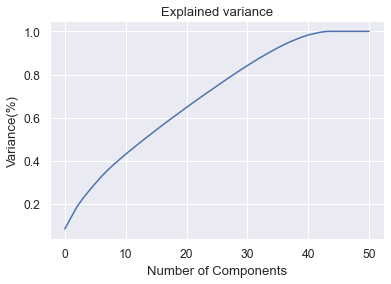

In [575]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance(%)")
plt.title("Explained variance")
plt.show()

**As we can see more than 35 component the model covers more than 90% of variance.but we will see accuracy without removing any featues.**

In [576]:
pca=PCA(n_components=35)

In [577]:
new_data_pca=pca.fit_transform(x_scaled)

# Model Building

# 17.1 Logistic Regression

In [578]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [579]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=101)

In [580]:
lr=LogisticRegression()

# 17.2 Choosing best random state for our model

In [581]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [591]:
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"Model perfrom well")
        print("At random state",i)
        print("Training accuracy score is-",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy score is-",accuracy_score(y_test,pred_test)*100)
   

At random state 2 Model perfrom well
At random state 2
Training accuracy score is- 81.58226650690547
Testing accuracy score is- 81.62154208357857
At random state 5 Model perfrom well
At random state 5
Training accuracy score is- 81.49397742322003
Testing accuracy score is- 81.53325485579754
At random state 46 Model perfrom well
At random state 46
Training accuracy score is- 81.54127514662294
Testing accuracy score is- 81.53325485579754
At random state 47 Model perfrom well
At random state 47
Training accuracy score is- 81.37730970549283
Testing accuracy score is- 81.35668040023543
At random state 48 Model perfrom well
At random state 48
Training accuracy score is- 81.4529860629375
Testing accuracy score is- 81.49646851088875
At random state 57 Model perfrom well
At random state 57
Training accuracy score is- 81.3993819764142
Testing accuracy score is- 81.38610947616245
At random state 87 Model perfrom well
At random state 87
Training accuracy score is- 81.46244560761808
Testing accurac

**We can choose best cv 281.**

In [700]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=281)

In [701]:
lr=LogisticRegression()

In [702]:
lr.fit(x_train,y_train)

LogisticRegression()

## 17.3 Evaluation metrics

In [703]:
y_pred=lr.predict(x_test)

In [704]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,plot_confusion_matrix


In [705]:
lr_acc_score=accuracy_score(y_test,y_pred)

In [706]:
train_pred=lr.predict(x_train)

In [707]:
accuracy_score(y_train,train_pred)

0.8139307561329381

In [708]:
confusion_matrix(y_test,y_pred)

array([[5331, 1374],
       [1155, 5732]], dtype=int64)

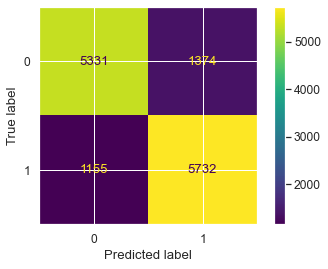

In [709]:
plot_confusion_matrix(lr,x_test,y_test,values_format=".4g")

In [710]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      6705
           1       0.81      0.83      0.82      6887

    accuracy                           0.81     13592
   macro avg       0.81      0.81      0.81     13592
weighted avg       0.81      0.81      0.81     13592



## 17.4 Finding Best CV for model

In [711]:
from sklearn.model_selection import cross_val_score,cross_validate

In [712]:
for j in range(2,12):
    lr_score=cross_val_score(lr,x_scaled,y,cv=j)
    lr_s=lr_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",lr_score*100)
    print("Accuracy Score:",lr_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [81.14598508 81.73310378]
Accuracy Score: 81.43954443120116


At CV:- 3
Cross validation score is: [80.96940803 81.71765329 81.56535558]
Accuracy Score: 81.41747229947468


At CV:- 4
Cross validation score is: [80.80692151 81.45139931 81.67932191 81.64400494]
Accuracy Score: 81.39541192122492


At CV:- 5
Cross validation score is: [81.04171265 81.26034654 81.53625428 81.88941618 81.5693632 ]
Accuracy Score: 81.45941856941518


At CV:- 6
Cross validation score is: [80.81048868 81.14157065 81.8037346  81.81697788 81.84346444 81.27400344]
Accuracy Score: 81.44837328389175


At CV:- 7
Cross validation score is: [80.96709408 80.90529893 81.62855377 81.47404203 82.0302843  81.9684796
 81.0105068 ]
Accuracy Score: 81.4263227884289


At CV:- 8
Cross validation score is: [80.70268362 81.05579096 81.26434752 81.70580964 81.59985873 81.7587851
 82.09429631 81.03478722]
Accuracy Score: 81.40204488622248


At CV:- 9
Cross validation score is: [80.45292014 81.287

**We can choose cv 10.**

In [714]:
cross_val_score(log_reg,x_scaled,y,cv=10)

array([0.80909292, 0.81306555, 0.80843081, 0.81615537, 0.81461046,
       0.81615537, 0.81986755, 0.81611479, 0.82119205, 0.80927152])

In [715]:
lr_cv_score=cross_val_score(log_reg,x_scaled,y,cv=10).mean()

In [716]:
lr_cv_score

0.8143956399451803

In [717]:
lr_acc_score

0.813934667451442

# 18.1 KNN Classifier

In [718]:
from sklearn.neighbors import KNeighborsClassifier

In [719]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=281)

In [720]:
knn=KNeighborsClassifier()

In [721]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

## 18.2 Evaluation Metrics

In [722]:
y_pred=knn.predict(x_test)

In [723]:
knn_acc_score=accuracy_score(y_test,y_pred)

In [724]:
knn_acc_score

0.8304885226603884

In [725]:
confusion_matrix(y_test,y_pred)

array([[5174, 1531],
       [ 773, 6114]], dtype=int64)

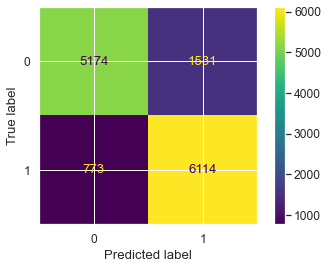

In [726]:
plot_confusion_matrix(knn,x_test,y_test,values_format=".4g")

In [727]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      6705
           1       0.80      0.89      0.84      6887

    accuracy                           0.83     13592
   macro avg       0.83      0.83      0.83     13592
weighted avg       0.83      0.83      0.83     13592



## 18.3 Finding Best CV for model

In [728]:
for j in range(2,12):
    knn_score=cross_val_score(knn,x_scaled,y,cv=j)
    knn_s=knn_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",knn_score*100)
    print("Accuracy Score:",knn_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [81.36229197 81.45499492]
Accuracy Score: 81.40864344678408


At CV:- 3
Cross validation score is: [81.99576215 82.56522315 82.41292544]
Accuracy Score: 82.3246369134331


At CV:- 4
Cross validation score is: [82.6697272  83.11997881 83.16263465 83.20678086]
Accuracy Score: 83.03978037908325


At CV:- 5
Cross validation score is: [82.91767822 83.39035427 83.47864474 83.25791855 83.35724534]
Accuracy Score: 83.28036822253135


At CV:- 6
Cross validation score is: [83.11481923 83.67103695 83.89617269 83.55184744 83.55184744 83.55184744]
Accuracy Score: 83.5562618637708


At CV:- 7
Cross validation score is: [83.16082188 84.36582728 83.79171817 83.52904821 84.14709518 83.97713226
 83.60630408]
Accuracy Score: 83.79684957952593


At CV:- 8
Cross validation score is: [82.68008475 84.76341808 83.89546177 84.0897051  83.98375419 84.01907116
 84.03672965 83.70121844]
Accuracy Score: 83.89618039239748


At CV:- 9
Cross validation score is: [82.439412   84.52

**We can choose best cv 10.**

In [732]:
cross_val_score(knn,x_scaled,y,cv=10)

array([0.82917678, 0.84617082, 0.84992275, 0.83932907, 0.84175679,
       0.84065328, 0.84238411, 0.8419426 , 0.84260486, 0.83664459])

In [733]:
knn_cv_score=cross_val_score(knn,x_scaled,y,cv=11).mean()
knn_cv_score

0.8408378811080326

In [734]:
knn_acc_score

0.8304885226603884

# 19.1 RandomForest Classifier

In [735]:
from sklearn.ensemble import RandomForestClassifier

In [736]:
rfc=RandomForestClassifier()

In [737]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

## 19.2 Evaluation Matrix

In [738]:
y_pred=rfc.predict(x_test)

In [739]:
rfc_acc_score=accuracy_score(y_test,y_pred)

In [740]:
rfc_acc_score

0.9242201294879341

In [741]:
confusion_matrix(y_test,y_pred)

array([[5892,  813],
       [ 217, 6670]], dtype=int64)

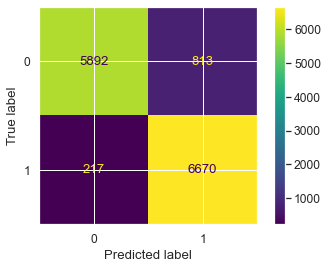

In [742]:
plot_confusion_matrix(rfc,x_test,y_test,values_format=".4g")

In [743]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      6705
           1       0.89      0.97      0.93      6887

    accuracy                           0.92     13592
   macro avg       0.93      0.92      0.92     13592
weighted avg       0.93      0.92      0.92     13592



## 19.3 Finding Best CV for model

In [744]:
for j in range(2,12):
    rfc_score=cross_val_score(rfc,x_scaled,y,cv=j)
    rfc_s=rfc_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",rfc_score*100)
    print("Accuracy Score:",rfc_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [90.15141482 90.2485322 ]
Accuracy Score: 90.19997351344193


At CV:- 3
Cross validation score is: [91.5375447  91.8222752  91.85538339]
Accuracy Score: 91.73840109477774


At CV:- 4
Cross validation score is: [92.1338395  92.95488655 92.85714286 92.37153452]
Accuracy Score: 92.57935085806875


At CV:- 5
Cross validation score is: [92.81615537 93.04712504 92.87054409 93.54375897 92.74914469]
Accuracy Score: 93.00534563171009


At CV:- 6
Cross validation score is: [92.8618726  93.32538737 93.37836048 93.04727851 93.51079327 92.91484572]
Accuracy Score: 93.17308965699908


At CV:- 7
Cross validation score is: [93.17163603 93.27977754 93.52595797 93.23238566 93.77317676 93.47960445
 92.73794808]
Accuracy Score: 93.31435521336824


At CV:- 8
Cross validation score is: [92.90254237 93.50282486 93.64294544 93.78421331 93.27211725 93.92548119
 93.30743422 92.79533816]
Accuracy Score: 93.39161210120008


At CV:- 9
Cross validation score is: [92.76916965 93.

**We can choose best CV 11.**

In [745]:
cross_val_score(rfc,x_scaled,y,cv=11)

array([0.93226511, 0.93930566, 0.93809177, 0.94149065, 0.94319009,
       0.931294  , 0.94027677, 0.94173343, 0.93904808, 0.93759106,
       0.93006314])

In [746]:
rfc_cv_score=cross_val_score(rfc,x_scaled,y,cv=11).mean()

In [747]:
rfc_cv_score

0.9367852215392034

In [748]:
rfc_acc_score

0.9242201294879341

# 20.1 XtremeGrandientBoosting Classifier

In [749]:
import xgboost as xgb

In [750]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=281)

In [751]:
xgb=xgb.XGBClassifier(eval_metric='mlogloss')

In [752]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

#  20.2 Evaluation matrix

In [753]:
y_pred=xgb.predict(x_test)

In [754]:
xgb_acc_score=accuracy_score(y_test,y_pred)

In [755]:
confusion_matrix(y_test,y_pred)

array([[5585, 1120],
       [ 680, 6207]], dtype=int64)

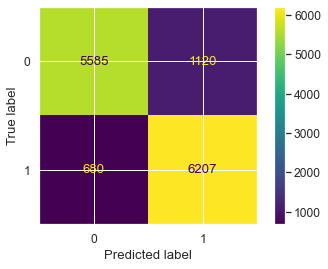

In [756]:
plot_confusion_matrix(xgb,x_test,y_test,values_format=".4g")

In [757]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      6705
           1       0.85      0.90      0.87      6887

    accuracy                           0.87     13592
   macro avg       0.87      0.87      0.87     13592
weighted avg       0.87      0.87      0.87     13592



## 20.3 Finding Best CV for model

In [758]:
for j in range(2,12):
    xgb_score=cross_val_score(xgb,x_scaled,y,cv=j)
    xgb_s=xgb_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",xgb_score*100)
    print("Accuracy Score:",xgb_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [86.10780029 86.17401669]
Accuracy Score: 86.14090848894188


At CV:- 3
Cross validation score is: [86.8626672  86.90239703 86.92226195]
Accuracy Score: 86.89577539398755


At CV:- 4
Cross validation score is: [86.42182396 86.96918866 87.01218435 87.33003708]
Accuracy Score: 86.93330851552568


At CV:- 5
Cross validation score is: [86.68064445 86.91093698 87.1647721  87.38549829 86.8116102 ]
Accuracy Score: 86.99069240383072


At CV:- 6
Cross validation score is: [86.76996424 86.91564031 86.98185671 87.10104622 87.18050589 86.90239703]
Accuracy Score: 86.97523506820289


At CV:- 7
Cross validation score is: [86.5286575  87.23930171 86.80469716 86.86650185 87.82447466 87.34548826
 86.75834363]
Accuracy Score: 87.05249496823207


At CV:- 8
Cross validation score is: [86.17584746 86.65254237 87.26823239 87.30354936 86.8974042  87.30354936
 87.40950026 87.03867208]
Accuracy Score: 87.00616218457907


At CV:- 9
Cross validation score is: [86.11442193 87.

In [759]:
cross_val_score(xgb,x_scaled,y,cv=10)

array([0.86912381, 0.86846171, 0.87287574, 0.87331715, 0.87022732,
       0.86956522, 0.87593819, 0.8803532 , 0.87196468, 0.86843267])

In [760]:
xgb_cv_score=cross_val_score(xgb,x_scaled,y,cv=10).mean()

In [761]:
xgb_cv_score

0.8720259697360785

In [762]:
xgb_acc_score

0.8675691583284285

# 21.1 Decision Tree Classifier

In [763]:
from sklearn.tree import DecisionTreeClassifier

In [791]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=281)

In [792]:
dtc=DecisionTreeClassifier()

In [793]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

##  21.2 Evaluation matrix

In [794]:
y_pred=dtc.predict(x_test)

In [795]:
dtc_acc_score=accuracy_score(y_test,y_pred)

In [796]:
dtc_acc_score

0.9046497939964685

In [797]:
confusion_matrix(y_test,y_pred)

array([[5702, 1003],
       [ 293, 6594]], dtype=int64)

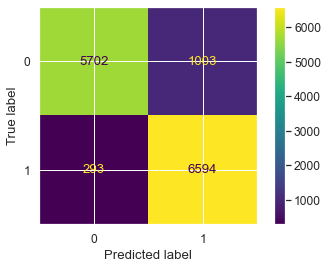

In [798]:
plot_confusion_matrix(dtc,x_test,y_test,values_format=".4g")

In [799]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      6705
           1       0.87      0.96      0.91      6887

    accuracy                           0.90     13592
   macro avg       0.91      0.90      0.90     13592
weighted avg       0.91      0.90      0.90     13592



## 21.3 Finding Best CV for model

In [800]:
for j in range(2,12):
    dtc_score=cross_val_score(dtc,x_scaled,y,cv=j)
    dtc_s=dtc_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",dtc_score*100)
    print("Accuracy Score:",dtc_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [87.91330067 87.44537147]
Accuracy Score: 87.67933607027767


At CV:- 3
Cross validation score is: [89.92186465 90.15362204 90.05429744]
Accuracy Score: 90.0432613781839


At CV:- 4
Cross validation score is: [90.7036285  90.98613931 91.09129437 91.41797634]
Accuracy Score: 91.0497596289994


At CV:- 5
Cross validation score is: [91.23813728 91.66758636 90.80675422 91.28131553 91.08266196]
Accuracy Score: 91.21529106859558


At CV:- 6
Cross validation score is: [91.4713283  91.92159979 91.1534896  91.60376109 92.33214144 91.28592239]
Accuracy Score: 91.62804043614531


At CV:- 7
Cross validation score is: [91.56496215 91.96663062 92.05809642 91.27008653 92.15080346 92.16625464
 91.70271941]
Accuracy Score: 91.83993617356592


At CV:- 8
Cross validation score is: [91.40183616 92.51412429 92.21260816 92.17729119 92.00070634 92.01836482
 92.01836482 91.64753664]
Accuracy Score: 91.99885405349524


At CV:- 9
Cross validation score is: [91.59713945 92.45

In [801]:
cross_val_score(dtc,x_scaled,y,cv=11)

array([0.92036902, 0.92740957, 0.92935178, 0.93008012, 0.92231124,
       0.92109735, 0.92619568, 0.91988347, 0.92569208, 0.92569208,
       0.91355027])

In [802]:
dtc_cv_score=cross_val_score(dtc,x_scaled,y,cv=11).mean()

In [803]:
dtc_cv_score

0.9227474177074584

In [804]:
dtc_acc_score

0.9046497939964685

# 22.Lets choose the best model with ROC AUC Curve

In [805]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [806]:
lr_pred=lr.predict(x_test)
knn_pred=knn.predict(x_test)
rfc_pred=rfc.predict(x_test)
xgb_pred=xgb.predict(x_test)
dtc_pred=dtc.predict(x_test)

In [807]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, lr_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, knn_pred, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rfc_pred, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, xgb_pred, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, dtc_pred, pos_label=1)

In [808]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [809]:
# auc scores
auc_score_lr = roc_auc_score(y_test, lr_pred)
auc_score_knn = roc_auc_score(y_test, knn_pred)
auc_score_rfc = roc_auc_score(y_test, rfc_pred)
auc_score_xgb = roc_auc_score(y_test, xgb_pred)
auc_score_dtc = roc_auc_score(y_test, dtc_pred)
print(round(auc_score_lr,2)*100, round(auc_score_knn,2)*100,round(auc_score_rfc,2)*100,round(auc_score_xgb,2)*100,round(auc_score_dtc,2)*100)

81.0 83.0 92.0 87.0 90.0


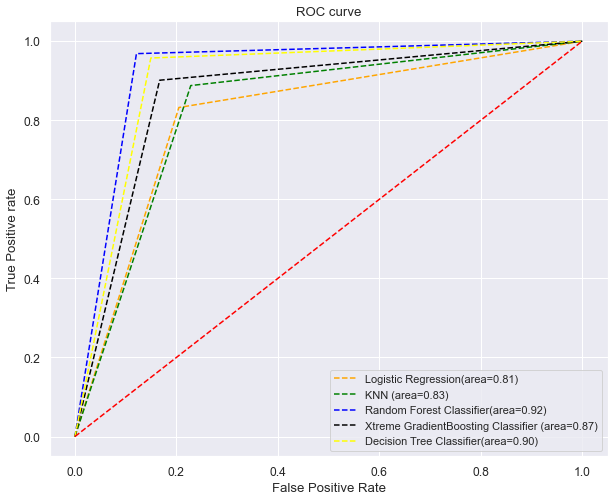

In [816]:
plt.figure(figsize=(10,8))
plt.plot(fpr1, tpr1, linestyle='--',color='darkorange','linewidth'=4, label='Logistic Regression(area=%0.2f)'% auc_score_lr)
plt.plot(fpr2, tpr2, linestyle='--',color='green','linewidth'=4, label='KNN (area=%0.2f)'% auc_score_knn)
plt.plot(fpr3,tpr3,linestyle='--',color='navy','linewidth'=4, label='Random Forest Classifier(area=%0.2f)'% auc_score_rfc)
plt.plot(fpr4, tpr4, linestyle='--',color='deeppink','linewidth'=4, label='Xtreme GradientBoosting Classifier (area=%0.2f)'% auc_score_xgb)
plt.plot(fpr5,tpr5,linestyle='--',color='aqua','linewidth'=4, label='Decision Tree Classifier(area=%0.2f)'% auc_score_dtc)

plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(prop={'size':11},loc='lower right')
plt.savefig('ROC',dpi=300)
plt.show();

**As we can see from Roc Auc Curve that Random Forest Classifier amd XtremeGradient boosting Classifier model is performing well in this dataset.**

# 23 Choosing best model by checking cross validation score

In [817]:
Logistic_Regression={"Accuracy Score":(lr_acc_score,2),
                    "CV Score":(lr_cv_score,2),
                    "Difference":lr_acc_score-lr_cv_score}
Knn={"Accuracy Score":(knn_acc_score,2),
                    "CV Score":(knn_cv_score,2),
                    "Difference":knn_acc_score-knn_cv_score}
Random_Forest_Classifier={"Accuracy Score":(rfc_acc_score,2),
                    "CV Score":(rfc_cv_score,2),
                    "Difference":rfc_acc_score-rfc_cv_score}
Xtreme_Gradient_Boost_Classifier={"Accuracy Score":(xgb_acc_score,2),
                    "CV Score":(xgb_cv_score,2),
                    "Difference":xgb_acc_score-xgb_cv_score}
Decistion_Tree_Classifier={"Accuracy Score":(dtc_acc_score,2),
                    "CV Score":(dtc_cv_score,2),
                    "Difference":dtc_acc_score-dtc_cv_score}


In [818]:
data=np.array([[lr_acc_score,lr_cv_score,lr_acc_score-lr_cv_score],[knn_acc_score,knn_cv_score,knn_acc_score-knn_cv_score],[rfc_acc_score,rfc_cv_score,rfc_acc_score-rfc_cv_score],[xgb_acc_score,xgb_cv_score,xgb_acc_score-xgb_cv_score],[dtc_acc_score,dtc_cv_score,dtc_acc_score-dtc_cv_score]])

In [819]:
index_value=["LogisticRegression","KNeighborsClassifier","RandomForestClassifier","XtremeGradientBoostClassifier","DecisionTreeClassifier"]

In [820]:
columns_value=["Accuracy Score","Cross Validation Score","Difference"]

In [821]:
model_selection=pd.DataFrame(data=data,
                            index=index_value,
                            columns=columns_value)

In [822]:
model_selection

,Accuracy Score,Cross Validation Score,Difference
LogisticRegression,0.813935,0.814396,-0.000461
KNeighborsClassifier,0.830489,0.840838,-0.010349
RandomForestClassifier,0.924220,0.936785,-0.012565
XtremeGradientBoostClassifier,0.867569,0.872026,-0.004457
DecisionTreeClassifier,0.904650,0.922747,-0.018098


**After comparing with CV score , we will select XtremeGradientBoosting Classifier model for our model,where the model accuracy is good and difference is less in accuracy score and CV score.**

# 22. Hypertuning for our best model ( XtremeGradientBoosting Classifier)

In [823]:
from sklearn.model_selection import GridSearchCV

In [824]:
grid_param={
    "colsample_bytree":[1,3,5],
    "max_depth":range(4,12,2),
    "learning_rate":np.arange(0.1,1,0.1),   
}

In [825]:
grd=GridSearchCV(xgb,param_grid=grid_param)

In [826]:
grd.fit(x_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eval_metric='mlogloss',
                                     gamma=0, gpu_id=-1, importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
    

In [827]:
grd.best_params_

{'colsample_bytree': 1, 'learning_rate': 0.8, 'max_depth': 10}

In [828]:
xgb=grd.best_estimator_

In [829]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.8, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [830]:
y_pred=xgb.predict(x_test)

In [831]:
accuracy_score(y_test,y_pred)

0.9174514420247204

**As we can see model accuracy score has increased from 86.5 to 91.7 after hypertuning.**

# 23 Performance of XGBClassifier after Hypertuning

In [832]:
xgb.fit(x_train,y_train)
pred=xgb.predict(x_train)
xgb_clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))

In [833]:
print("\n*******************Train Result*******************")
print("----------------------------------------------------")

print(f"Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%")
print("----------------------------------------------------")
print(f"Classification Report:\n{xgb_clf_report}")
print("----------------------------------------------------")
print(f"confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")

pred=xgb.predict(x_test)
clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n**********************Test Score******************")

print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
print("----------------------------------------------------")
print(f"Classification Report:\n{clf_report}")
print("----------------------------------------------------")
print(f"confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")





*******************Train Result*******************
----------------------------------------------------
Accuracy Score:99.70%
----------------------------------------------------
Classification Report:
                      0             1  accuracy     macro avg  weighted avg
precision      0.998679      0.995385  0.997036      0.997032      0.997041
recall         0.995423      0.998668  0.997036      0.997045      0.997036
f1-score       0.997048      0.997024  0.997036      0.997036      0.997036
support    15948.000000  15766.000000  0.997036  31714.000000  31714.000000
----------------------------------------------------
confusion Matrix:
[[15875    73]
 [   21 15745]]


**********************Test Score******************
Accuracy Score:91.75%
----------------------------------------------------
Classification Report:
                     0            1  accuracy     macro avg  weighted avg
precision     0.960416     0.882853  0.917451      0.921634      0.921115
recall        0.

# Saving Model

In [834]:
import pickle
filename="census_income.pkl"
pickle.dump(xgb,open(filename,"wb"))